# Computation of shape contour and area during growth of propagules.


##  Documentation and Imports


Created on 27-05-2021

Author: Valentin Laplaud

This code aims to compute the shape of propagules growing in microfluidic chips. It detects gemmae contours using binarization, and saves the data of the contour position on the image, as well as the area and geometrical center position of each gemmae. 

A second part fits the evolution of gemmae in time with a delayed exponential.

In [3]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()

# plotting stuff in jupyter
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2


# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# my functions
import sys
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/')
import VallapFunc as vf
from Main import BinarizeAndFitArea, BinarizeAndFitOsChoc
from GemmaeDetection import FindChipPos
import numpy as np
import pandas as pd

## Fetch data details

In [4]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/ExperimentList.py

Data choice made.


## Run analysis

### 03/27-09-2021 : Flux controls V5 

In [5]:
# BinarizeAndFitArea('210903_1mlh',StackList210903_1,P210903_1,Scale210903,FPH210903,Delay210903,0.98,'V^','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210903_500ulh',StackList210903_5,P210903_5,Scale210903,FPH210903,Delay210903,0.98,'Vv','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('210927_1mlh',StackList210927_1,P210927_1,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210927_500ulh',StackList210927_5,P210927_5,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### System control DV6 (22-10-2021)

In [6]:
# BinarizeAndFitArea('211022_Ct1',StackList211022_Ct1,P211022_Ct1,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211022_Ct2',StackList211022_Ct2,P211022_Ct2,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### Degas & BSA controls DV6 (05-11-2021, 22-12-2021)

In [7]:
# BinarizeAndFitArea('211105_Deg_Bsa',StackList211105_Deg_Bsa,P211105_Deg_Bsa,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 20, 70),(60, 120,220)])

# BinarizeAndFitArea('211105_Degas',StackList211105_Degas,P211105_Degas,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 20, 70),(60, 120,220)])



# BinarizeAndFitArea('211222_Deg_Bsa',StackList211222_Deg_Bsa,P211222_Deg_Bsa,Scale211222,FPH211222,Delay211222,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211222_Degas',StackList211222_Degas,P211222_Degas,Scale211222,FPH211222,Delay211222,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(30, 30, 70),(60, 120,220)])


### Stade comparison DV6 (07/12/14-01-2022)

In [8]:
# BinarizeAndFitArea('220107_S1',StackList220107_S1,P220107_S1,Scale220107,FPH220107,Delay220107,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(25, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220107_S3',StackList220107_S3,P220107_S3,Scale220107,FPH220107,Delay220107,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(25, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('220112_S1',StackList220112_S1,P220112_S1,Scale220112,FPH220112,Delay220112,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220112_S3',StackList220112_S3,P220112_S3,Scale220112,FPH220112,Delay220112,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S1',StackList220114_S1,P220114_S1,Scale220114,FPH220114,Delay220114,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(25, 25, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S3',StackList220114_S3,P220114_S3,Scale220114,FPH220114,Delay220114,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(25, 25, 70),(60, 120,220)])


### System controls with Stade1 & degas DV6 (24-01-2022,14-02-2022)

In [9]:
# BinarizeAndFitArea('220124_Ct1',StackList220124_Ct1,P220124_Ct1,Scale220124,FPH220124,Delay220124,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220124_Ct2',StackList220124_Ct2,P220124_Ct2,Scale220124,FPH220124,Delay220124,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct1',StackList220214_Ct1,P220214_Ct1,Scale220214,FPH220214,Delay220214,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0],HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct2',StackList220214_Ct2,P220214_Ct2,Scale220214,FPH220214,Delay220214,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, HSVrange =[(15, 17, 60),(70, 140,220)])


### Osmotic choc after 14-02-2022 

In [10]:
# BinarizeAndFitOsChoc('220214_Ct1_Osmo',StackList220214_Ct1_Osmo,P220214_Ct1_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])

# BinarizeAndFitOsChoc('220214_Ct2_Osmo',StackList220214_Ct2_Osmo,P220214_Ct2_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])
  

### Manitol 100mM (01-03-2022) + OC

In [11]:
# BinarizeAndFitArea('220301_Ct',StackList220301_Ct,P220301_Ct,Scale220301,FPH220301,Delay220301,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_Ct_Osmo',StackList220301_Ct_Osmo,P220301_Ct_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [23,60])

# BinarizeAndFitArea('220301_M100',StackList220301_M100,P220301_M100,Scale220301,FPH220301,Delay220301,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_M100_Osmo',StackList220301_M100_Osmo,P220301_M100_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H>','F',
#                    showHist = False, debug = True, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,22],FitIntervalRel = [27,60],TstartComp = 3,TstartRel = 6, saveWB = False)


### 31-05-2022 : DV7 ctrls + OC  

In [12]:
# BinarizeAndFitArea('220531_Ct1',StackList220531_Ct1,P220531_Ct1,Scale220531,FPH220531,Delay220531,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,30], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)

# BinarizeAndFitArea('220531_Ct2',StackList220531_Ct2,P220531_Ct2,Scale220531,FPH220531,Delay220531,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,10,40], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)


# BinarizeAndFitOsChoc('220531_Ct1_Osmo',StackList220531_Ct1_Osmo,P220531_Ct1_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,33],
#                      FitIntervalRel = [23,60])  

# BinarizeAndFitOsChoc('220531_Ct2_Osmo',StackList220531_Ct2_Osmo,P220531_Ct2_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, debuglist = [0,10,40], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,33],
#                      FitIntervalRel = [23,60])  



### 27-07-2022 : DV7 Controls 

In [13]:
# BinarizeAndFitArea('220727_Hyper',StackList220727_Hyper,P220727_Hyper,Scale220727,FPH220727,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [22], HSVrange =[(15, 25, 40),(70, 150,160)])


# BinarizeAndFitArea('220727_Hypo',StackList220727_Hypo,P220727_Hypo,Scale220727,FPH220727,Delay220722,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [36,50,55], HSVrange =[(20, 25, 40),(70, 150,190)])


### 01-08-2022 :DV7 Ctrls + OC 

In [14]:
# BinarizeAndFitArea('220801_Ct1',StackList220801_Ct1,P220801_Ct1,Scale220801,FPH220801,Delay220722,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220801_Ct2',StackList220801_Ct2,P220801_Ct2,Scale220801,FPH220801,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220801_Ct1_Osmo',StackList220801_Ct1_Osmo,P220801_Ct1_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H<','F',
#                    debug = True, showHist = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],FitIntervalComp = [0,12],
#                      FitIntervalRel = [23,60],TstartComp = 5,TstartRel = 9)


# BinarizeAndFitOsChoc('220801_Ct2_Osmo',StackList220801_Ct2_Osmo,P220801_Ct2_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H>','F',
#                    debug = True, showHist = False, debuglist = [0], HSVrange =[(20, 20, 40),(70, 160,180)],FitIntervalComp = [0,13],
#                      RelValidation = False,TstartComp = 3, FitIntervalRel = [10,13],TstartRel = 1)

### 08-08-2022 : DV7 Manitol 100mM + OC

In [15]:
# BinarizeAndFitArea('220808_Ct',StackList220808_Ct,P220808_Ct,Scale220808,FPH220808,Delay220808,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)])

# BinarizeAndFitArea('220808_100mM',StackList220808_100mM ,P220808_100mM ,Scale220808,FPH220808,Delay220808,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220808_Ct_Osmo',StackList220808_Ct_Osmo ,P220808_Ct_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [30,65],TstartComp = 4,TstartRel = 5)

# BinarizeAndFitOsChoc('220808_100mM_Osmo',StackList220808_100mM_Osmo ,P220808_100mM_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H>','F',
#                    debug = False, showHist = False, debuglist = [0,10,20,40], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      RelValidation = False,TstartComp = 4, FitIntervalRel = [30,65],TstartRel = 5)


### 28-09-2022 :DV7 Manitol 100mM + OC 

In [16]:
# BinarizeAndFitArea('220928_Ct',StackList220928_Ct,P220928_Ct,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_Ct_Osmo',StackList220928_Ct_Osmo ,P220928_Ct_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitArea('220928_100mM',StackList220928_100mM,P220928_100mM,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_100mM_Osmo',StackList220928_100mM_Osmo ,P220928_100mM_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)


### DV7 OC after pectinase (10U, 2h, 10-04-2022)

In [17]:
# BinarizeAndFitOsChoc('221004_Ct_Osmo',StackList221004_Ct_Osmo ,P221004_Ct_Osmo ,Scale221004_Osmo,FPH221004_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 25, 40),(70, 150,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitOsChoc('221004_Pase10U_Osmo',StackList221004_Pase10U_Osmo ,P221004_Pase10U_Osmo ,Scale221004_Osmo,FPH221004_Osmo,
#                      0.98,'H>','F',debug = False, showHist = False, debuglist = [0],HSVrange =[(15, 25, 40),(70, 150,190)],
#                      FitIntervalComp = [0,28],FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

### 25-10-2022 : DV7 Growth 100mM + OC 

In [18]:

# BinarizeAndFitArea('221025_Ct',StackList221025_Ct,P221025_Ct,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('221025_Ct_Osmo',StackList221025_Ct_Osmo ,P221025_Ct_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)

# BinarizeAndFitOsChoc('221025_Ct_Osmo2',StackList221025_Ct_Osmo2 ,P221025_Ct_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)


# BinarizeAndFitArea('221025_100mM',StackList221025_100mM,P221025_100mM,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,20], 
#                    HSVrange =[(15, 20, 40),(70, 170,190)], fitwindow = 15)


BinarizeAndFitOsChoc('221025_100mM_Osmo',StackList221025_100mM_Osmo ,P221025_100mM_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
                   debug = False, showHist = False, debuglist = [40,41,42,43,44,45,46,47,48,49], HSVrange =[(12, 3, 40),(80, 170,190)],FitIntervalComp = [0,24],
                     FitIntervalRel = [25,55],TstartComp = 5,TstartRel = 6, saveWB = False)

BinarizeAndFitOsChoc('221025_100mM_Osmo2',StackList221025_100mM_Osmo2 ,P221025_100mM_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
                   debug = False, showHist = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
                     FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 8)




221025_100mM_Osmo





Unknown key : C_Osmo. Kwarg ignored.
Sorting data.
Kept 29/33PPGs (87.88%)
Kept 28/29PPGs (96.55%)
Fitting curve for : PPG5 
Fitting curve for : PPG8 
Fitting curve for : PPG12
Fitting curve for : PPG15
Fitting curve for : PPG16
Fitting curve for : PPG19
Fitting curve for : PPG20
Fitting curve for : PPG21
Fitting curve for : PPG22
Fitting curve for : PPG23
Fitting curve for : PPG25
Fitting curve for : PPG27
Fitting curve for : PPG28
Fitting curve for : PPG29
Fitting curve for : PPG31
Fitting curve for : PPG33
Fitting curve for : PPG35
Fitting curve for : PPG38
Fitting curve for : PPG42
Fitting curve for : PPG43
Fitting curve for : PPG45
Fitting curve for : PPG46
Fitting curve for : PPGB 
Fitting curve for : PPGD 
Fitting curve for : PPGE 
Fitting curve for : PPGF 
Fitting curve for : PPGH 
Fitting curve for : PPGI 
Fitting curve for : PPGJ 
Analyzing : 221025_100mM_Osmo
Analyzing : 221025_100mM_Osmo



221025_100mM_Osmo2





Unknown key : C_Osmo. Kwarg ignore

### 01-12-2022 : DV7 OC after calcium treatment

In [19]:

# BinarizeAndFitOsChoc('221201_Ct_Osmo',StackList221201_Ct_Osmo ,P221201_Ct_Osmo ,Scale221201_Osmo,FPH221201_Osmo,0.95,'H>','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [7,35],
#                      FitIntervalRel = [35,60],TstartComp = 4,TstartRel = 6)

# BinarizeAndFitOsChoc('221201_Ct_Osmo2',StackList221201_Ct_Osmo2 ,P221201_Ct_Osmo2 ,Scale221201_Osmo2,FPH221201_Osmo2,0.95,'H>','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [4,30],
#                      FitIntervalRel = [32,60],TstartComp = 4,TstartRel = 5)

# BinarizeAndFitOsChoc('221201_Calcium_100mM_Osmo',StackList221201_Calcium_100mM_Osmo ,P221201_Calcium_100mM_Osmo ,Scale221201_Osmo,FPH221201_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [5,38],
#                      FitIntervalRel = [35,70],TstartComp = 14,TstartRel = 6, ignoreCompTimePoints = [6,7,8])

# BinarizeAndFitOsChoc('221201_Calcium_100mM_Osmo2',StackList221201_Calcium_100mM_Osmo2 ,P221201_Calcium_100mM_Osmo2 ,Scale221201_Osmo2,FPH221201_Osmo2,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [3,32],
#                      FitIntervalRel = [34,70],TstartComp = 3,TstartRel = 4)


### 06-12-2022 : OC after Pectinase 10U, 2h 

In [20]:
### 4h follow before chocs

# BinarizeAndFitArea('221206_Ct',StackList221206_Ct ,P221206_Ct ,Scale221206,FPH221206,Delay221206,0.95,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitArea('221206_Pase10U',StackList221206_Pase10U ,P221206_Pase10U ,Scale221206,FPH221206,Delay221206,0.95,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)




### chocs
# BinarizeAndFitOsChoc('221206_Ct_Osmo',StackList221206_Ct_Osmo ,P221206_Ct_Osmo ,Scale221206_Osmo,FPH221206_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0, 40], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,35],
#                      FitIntervalRel = [23,64],TstartComp = 10,TstartRel = 14)

# BinarizeAndFitOsChoc('221206_Pase10U_Osmo',StackList221206_Pase10U_Osmo ,P221206_Pase10U_Osmo ,Scale221206_Osmo,FPH221206_Osmo,
#                      0.98,'H>','F',debug = False, showHist = False, debuglist = [0],HSVrange =[(15, 20, 40),(70, 170,190)],
#                      FitIntervalComp = [0,35],FitIntervalRel = [23,64],TstartComp = 10,TstartRel = 15)

### 09-01-2023 : Pectinase growth test

In [21]:
# BinarizeAndFitArea('230109_Ct',StackList230109_Ct,P230109_Ct ,Scale230109,FPH230109,Delay230109,0.95,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitArea('230109_Pase5U',StackList230109_Pase5U ,P230109_Pase5U ,Scale230109,FPH230109,Delay230109,0.95,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,80], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitArea('230109_Pase10U',StackList230109_Pase10U ,P230109_Pase10U ,Scale230109,FPH230109,Delay230109,0.95,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0, 80], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)


### 01-02-2023 : 100mM growth + OC

In [22]:
# BinarizeAndFitArea('230201_Ct',StackList230201_Ct,P230201_Ct,Scale230201,FPH230201,Delay230201,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(23, 30, 60),(60, 250,150)],fitwindow = 15)

# BinarizeAndFitOsChoc('230201_Ct_Osmo',StackList230201_Ct_Osmo,P230201_Ct_Osmo,Scale230201_Osmo,FPH230201_Osmo,0.95,'H<','F',
#                    showHist = False, debug = True, debuglist = [0], HSVrange =[(23, 30, 60),(60, 250,150)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [26,60],TstartComp = 7,TstartRel = 10)

# BinarizeAndFitArea('230201_100mM',StackList230201_100mM,P230201_100mM,Scale230201,FPH230201,Delay230201,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(23, 30, 60),(60, 250,150)],fitwindow = 15)

# BinarizeAndFitOsChoc('230201_100mM_Osmo',StackList230201_100mM_Osmo,P230201_100mM_Osmo,Scale230201_Osmo,FPH230201_Osmo,0.95,'H>','F',
#                    showHist = False, debug = True, debuglist = [0], HSVrange =[(23, 30, 60),(60, 250,150)],
#                      FitIntervalComp = [0,22],FitIntervalRel = [27,60],TstartComp = 6,TstartRel = 8, saveWB = False)


### 21-02-2023 : ABA 3.5µM growth + OC

In [23]:
# BinarizeAndFitArea('230221_Ct',StackList230221_Ct,P230221_Ct,Scale230221,FPH230221,Delay230221,0.98,'H<','F',
#                    debug = False, debugAll = False, verbose = True, debuglist = [0,55], HSVrange =[(23, 30, 60),(60, 250,180)],
#                    fitwindow = 15,saveWB = False)

# BinarizeAndFitOsChoc('230221_Ct_Osmo',StackList230221_Ct_Osmo,P230221_Ct_Osmo,Scale230221_Osmo,FPH230221_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, debuglist = [0,35], HSVrange =[(23, 30, 60),(60, 250,180)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [26,60],TstartComp = 5,TstartRel = 10)

# BinarizeAndFitArea('230221_ABA',StackList230221_ABA,P230221_ABA,Scale230221,FPH230221,Delay230221,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0,59], HSVrange =[(23, 30, 60),(60, 250,180)],
#                    fitwindow = 15,saveWB = True)

# BinarizeAndFitOsChoc('230221_ABA_Osmo',StackList230221_ABA_Osmo,P230221_ABA_Osmo,Scale230221_Osmo,FPH230221_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, debuglist = [0,66], HSVrange =[(23, 30, 60),(60, 250,180)],
#                      FitIntervalComp = [0,22],FitIntervalRel = [27,60],TstartComp = 6,TstartRel = 9, saveWB = True)

### 01-03-2023 : ABA 3.5µM growth + OC




230301_Ct_Osmo





Unknown key : C_Osmo. Kwarg ignored.
Sorting data.


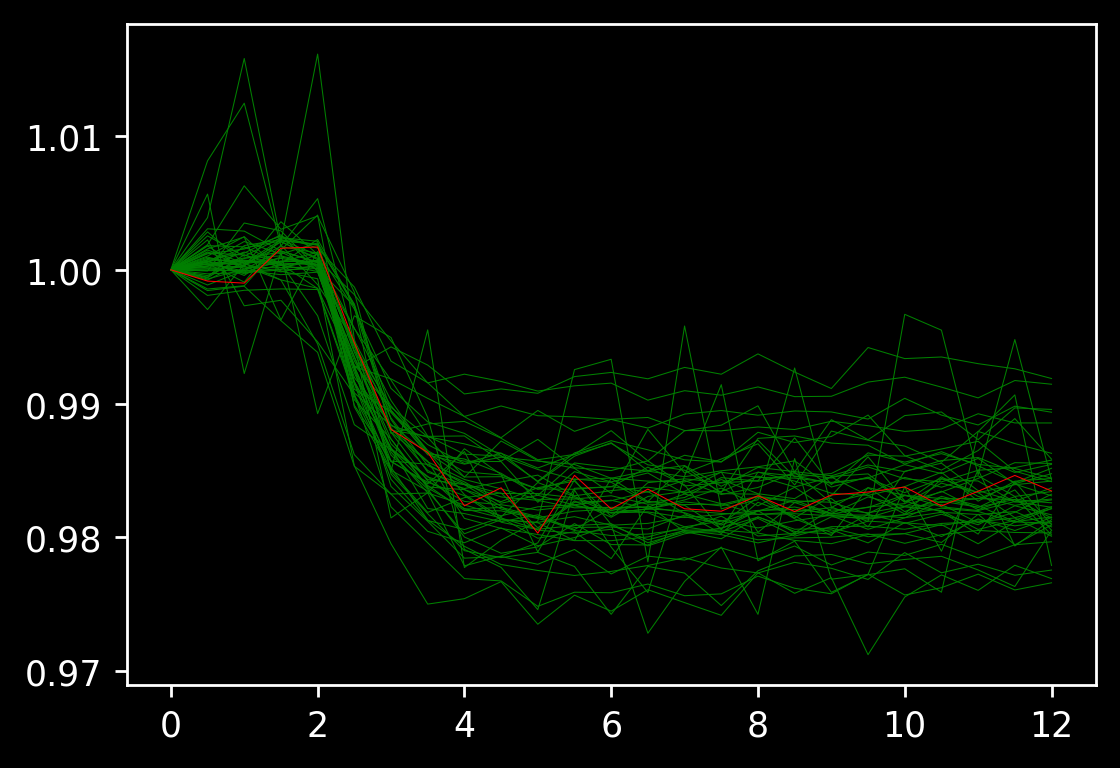

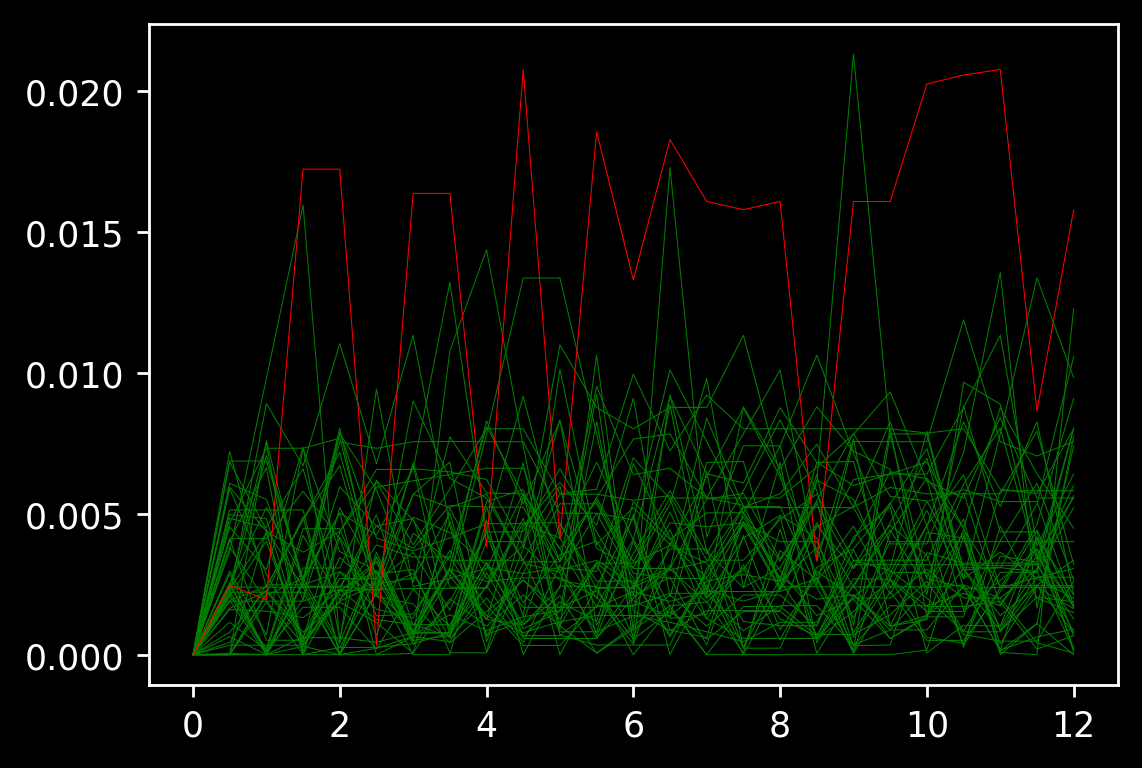

Kept 48/49PPGs (97.96%)


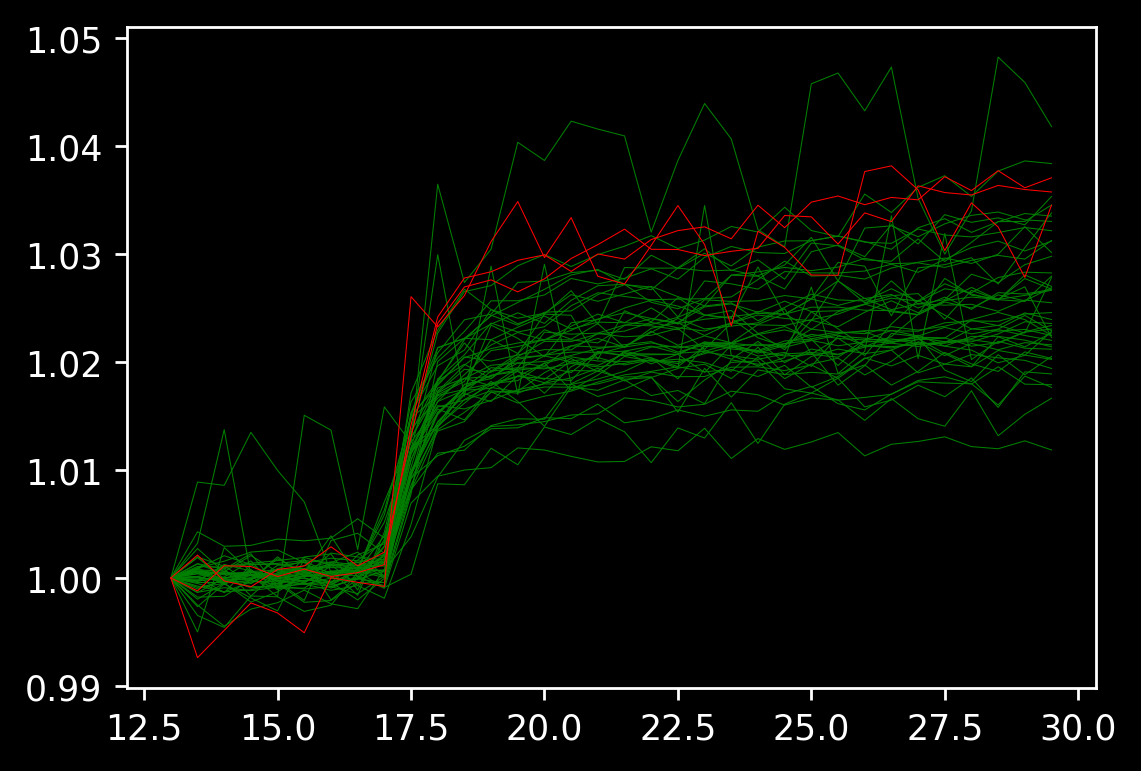

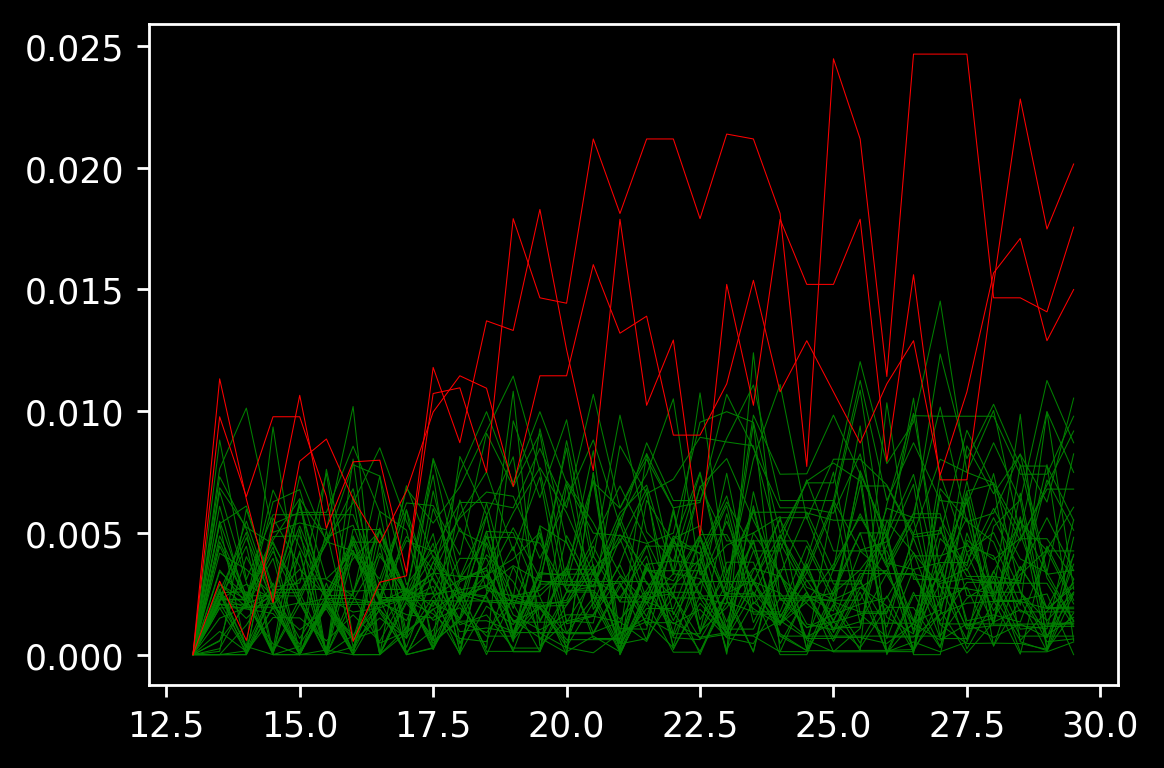

Kept 45/48PPGs (93.75%)
Fitting curve for : PPG1 


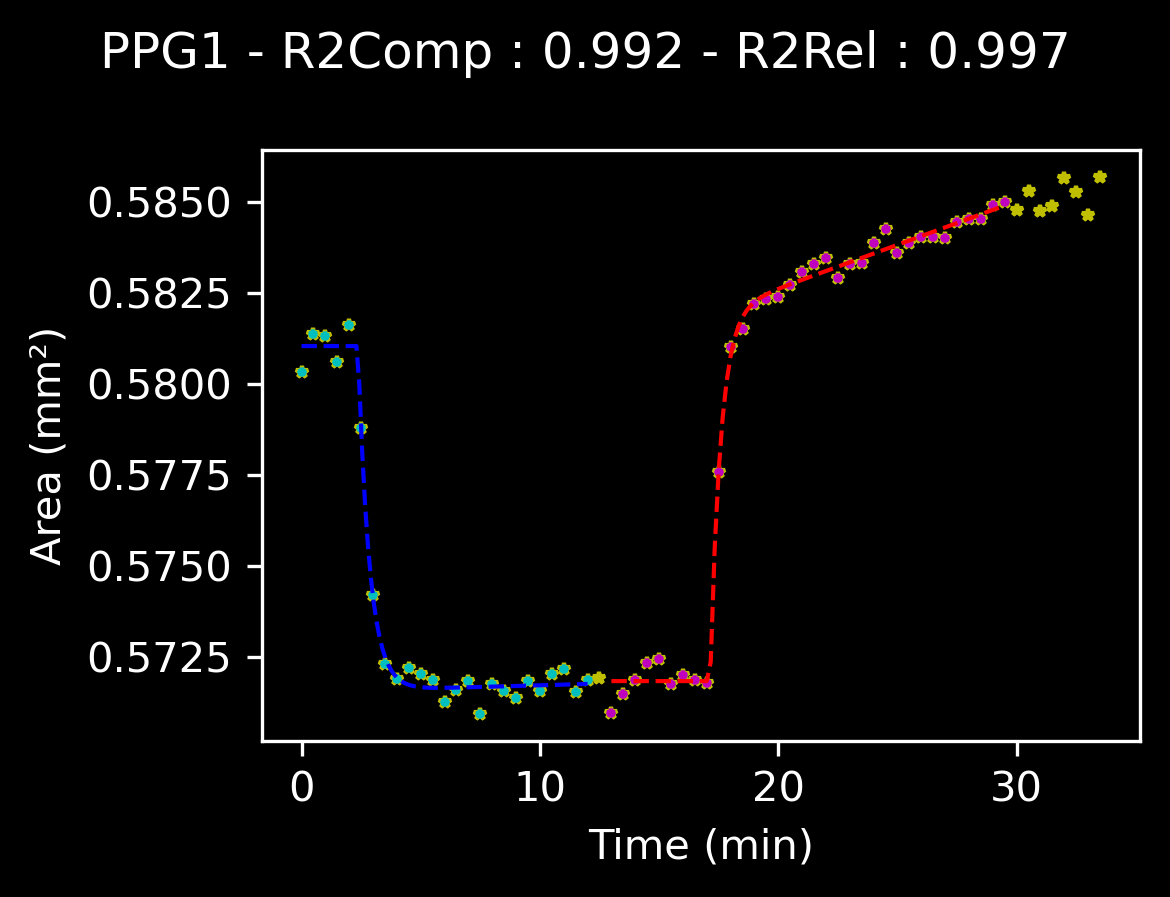

Fitting curve for : PPG2 


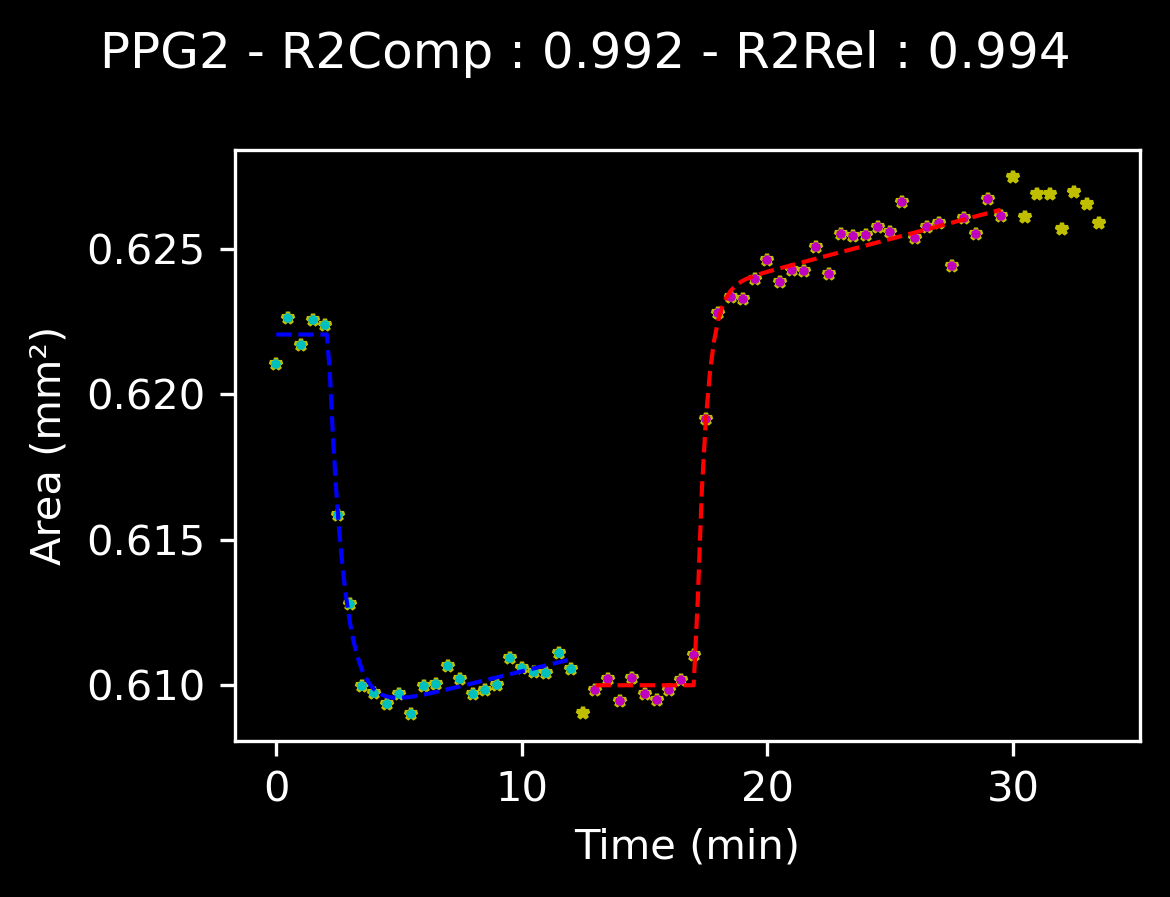

Fitting curve for : PPG3 


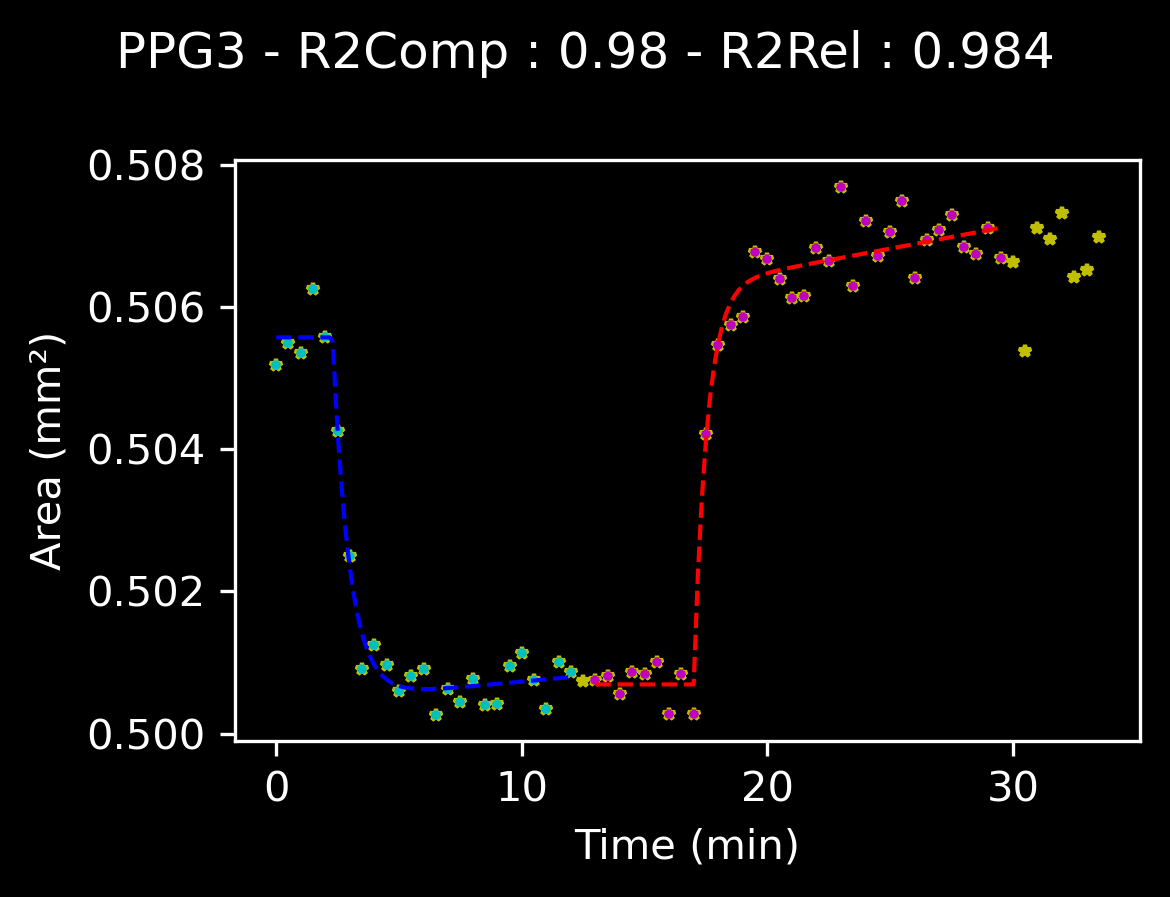

Fitting curve for : PPG5 


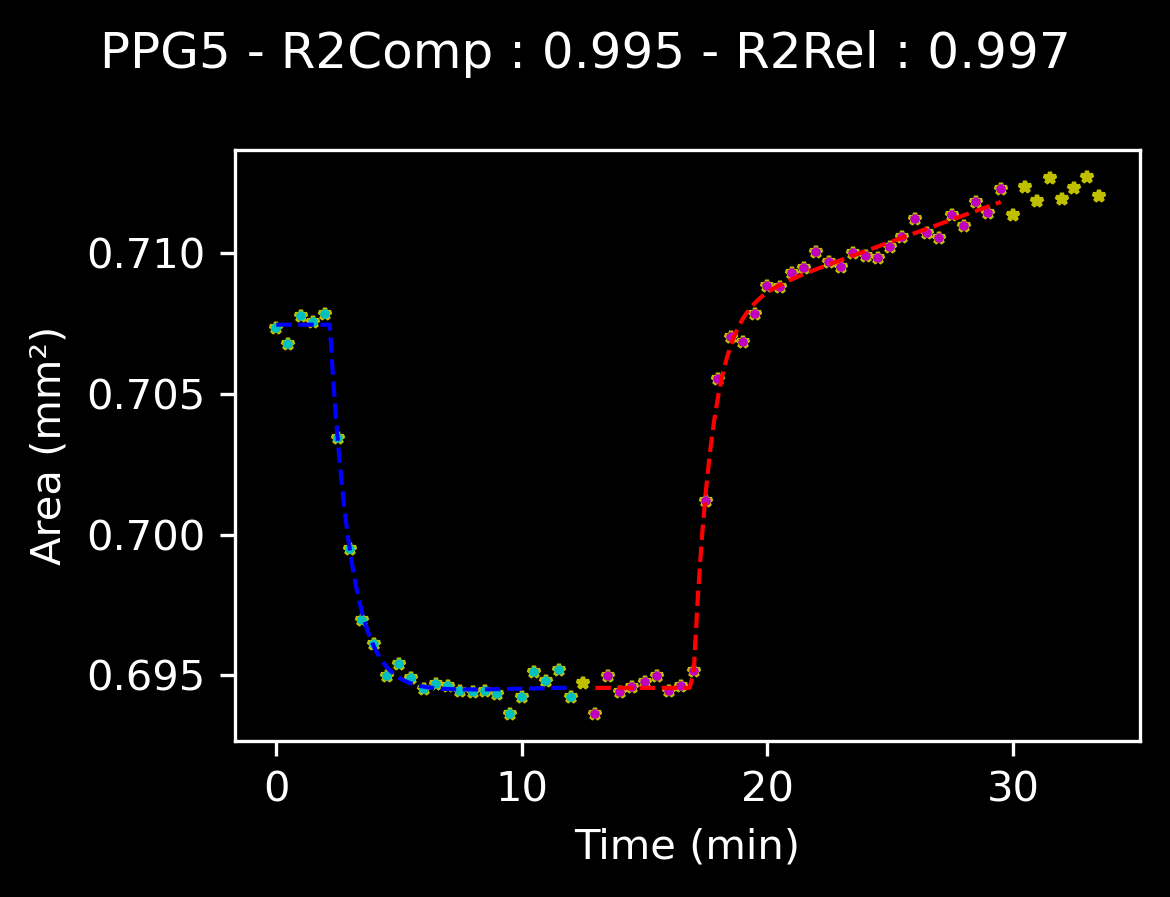

Fitting curve for : PPG6 


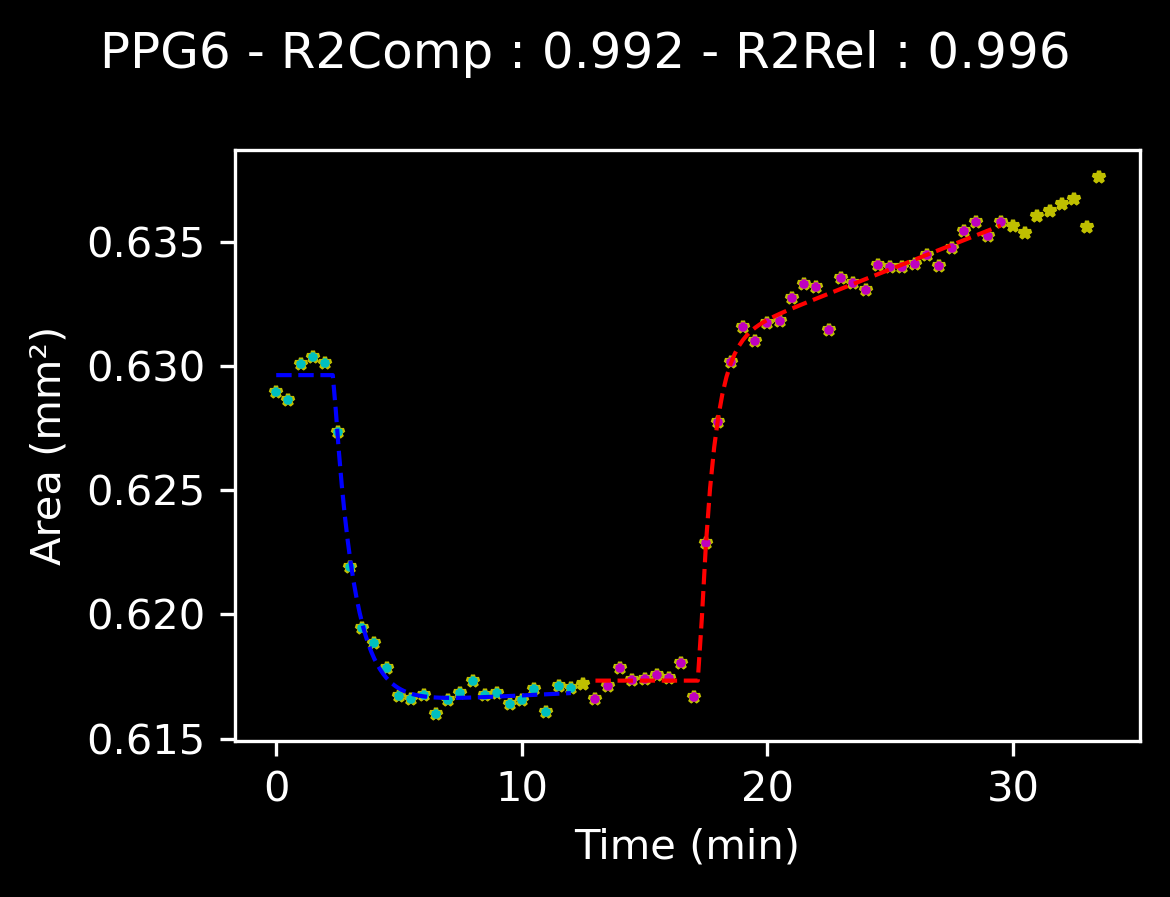

Fitting curve for : PPG7 


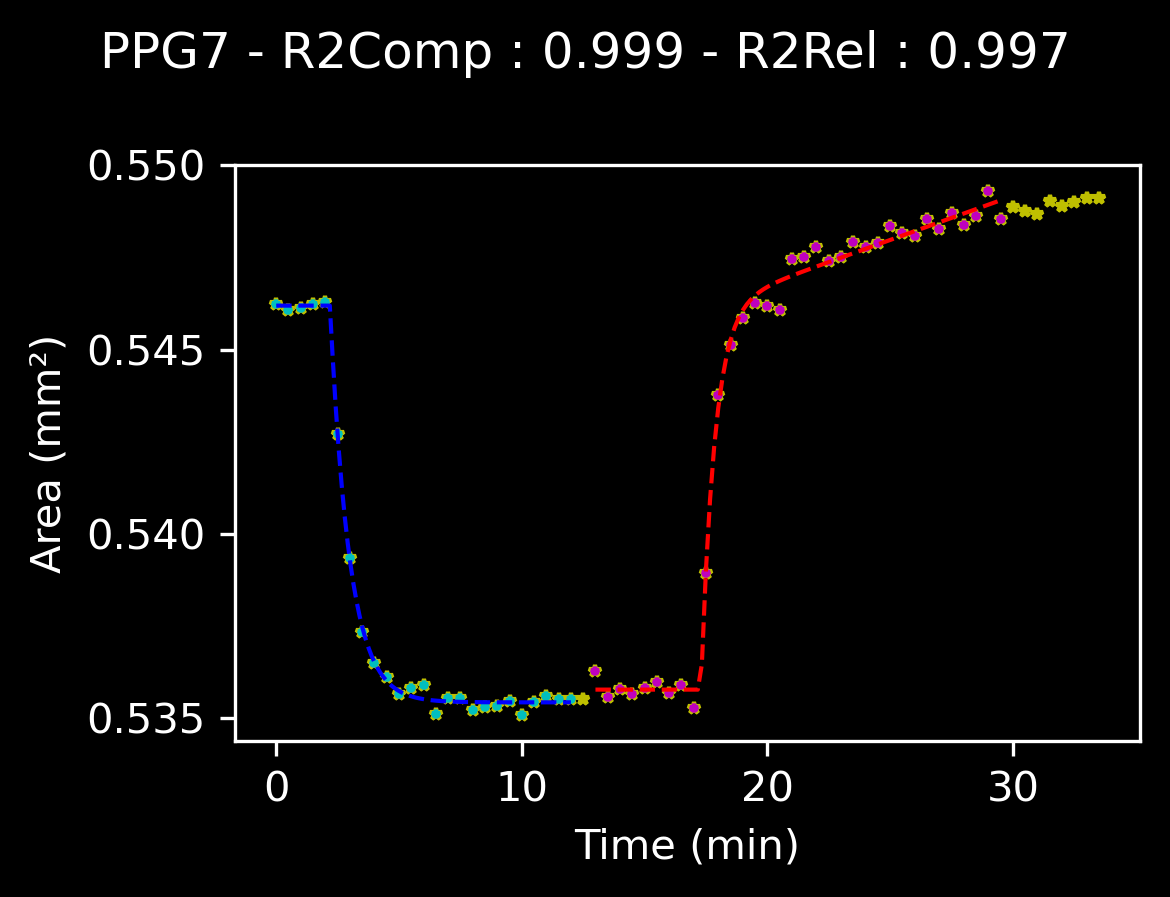

Fitting curve for : PPG8 


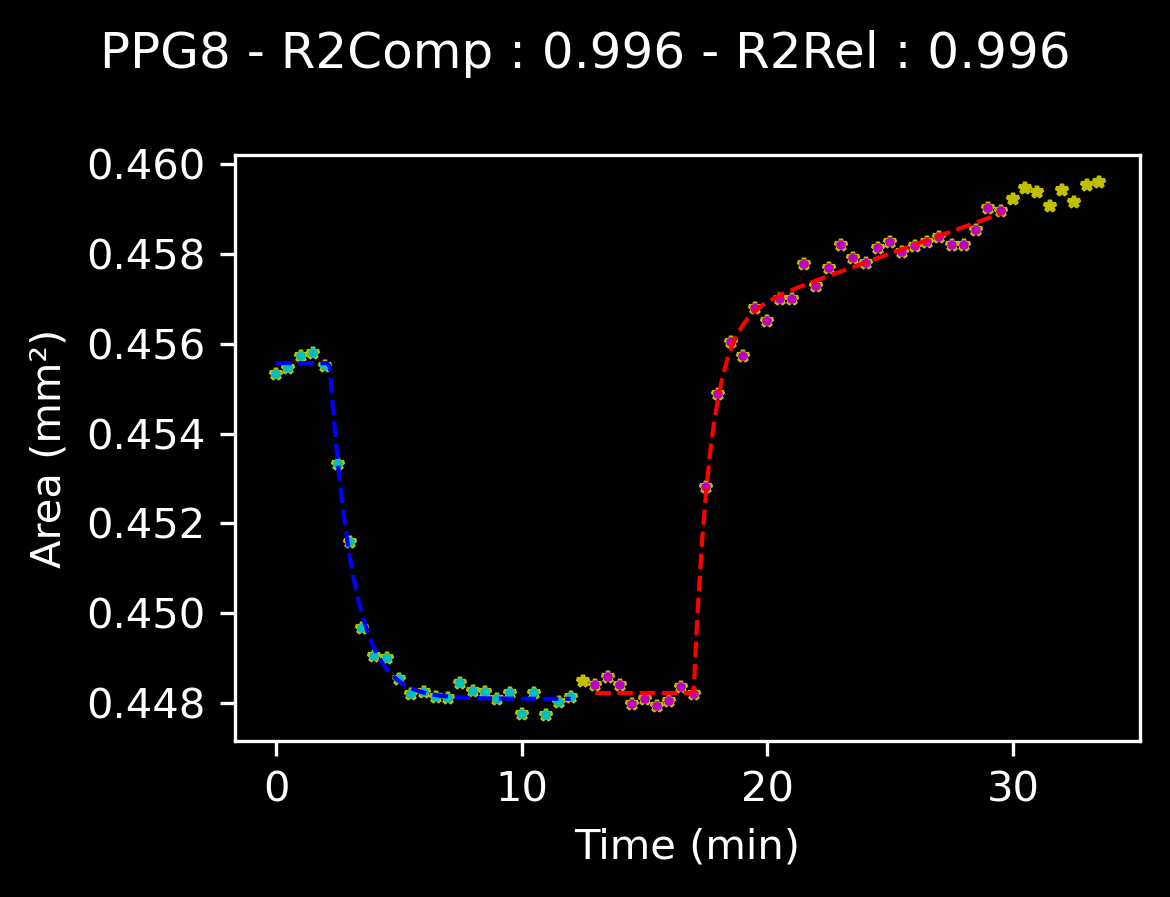

Fitting curve for : PPG11


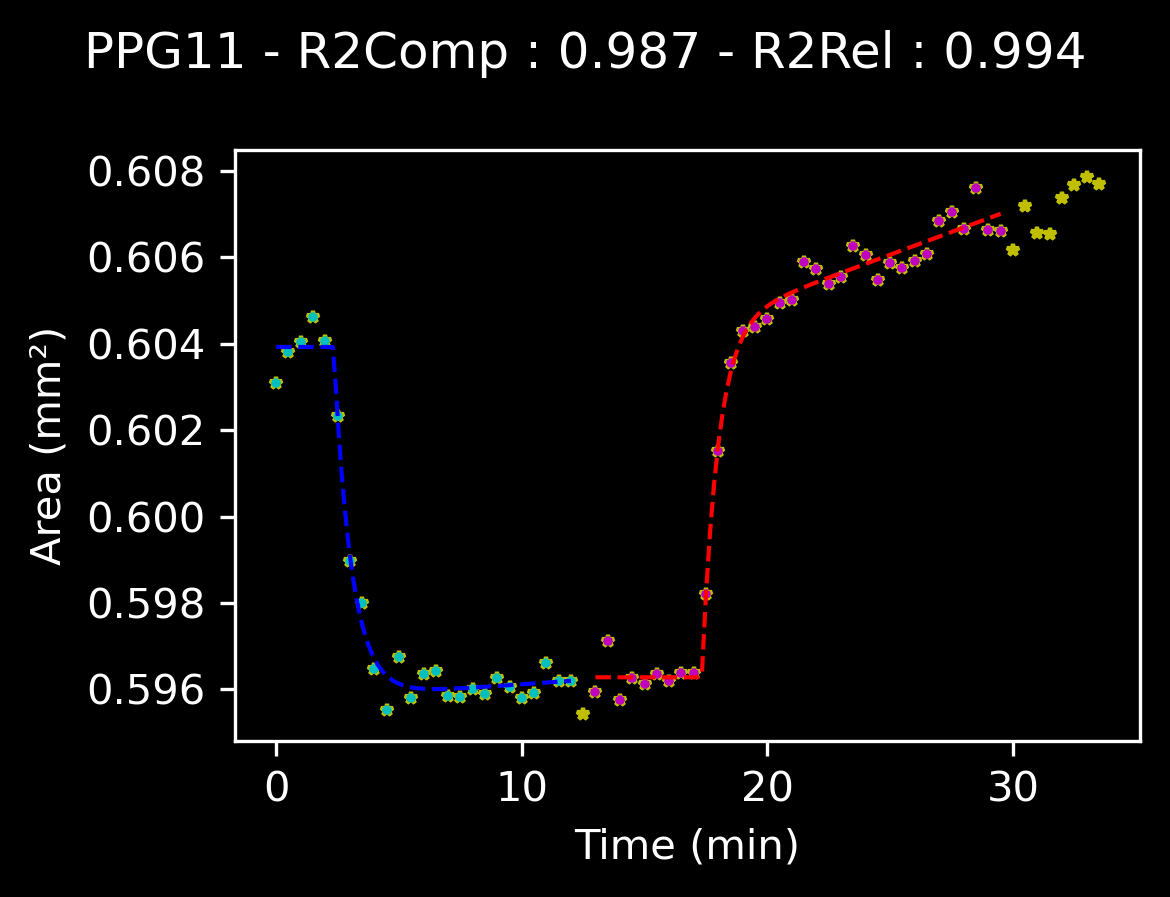

Fitting curve for : PPG12


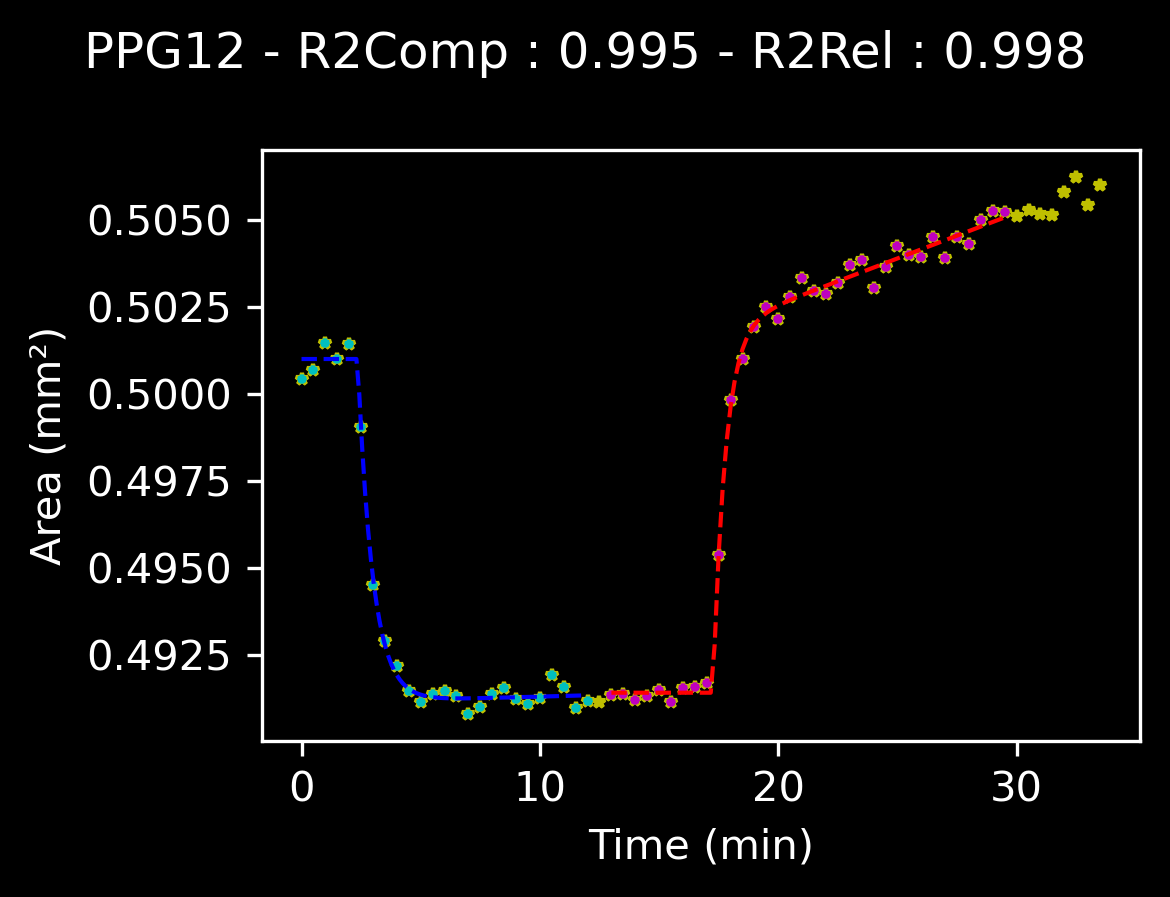

Fitting curve for : PPG13


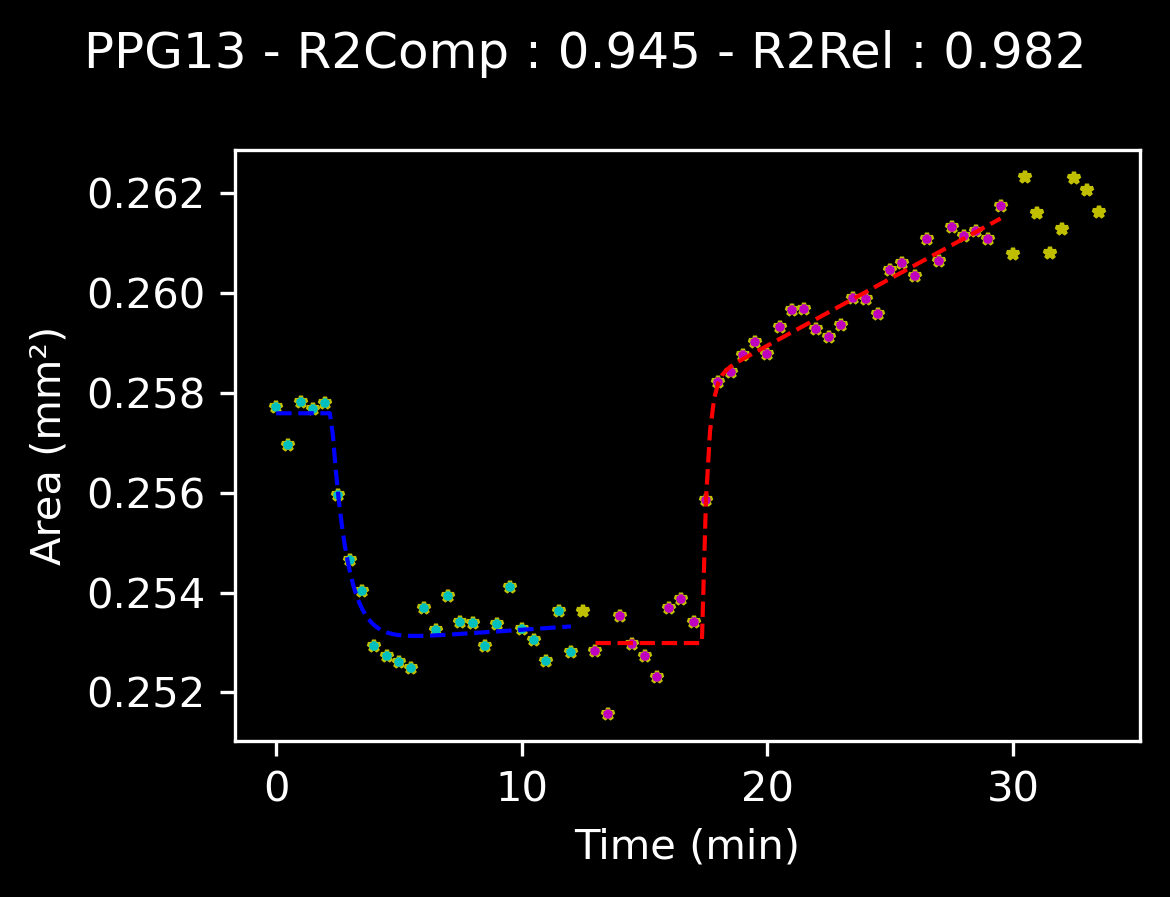

Fitting curve for : PPG14


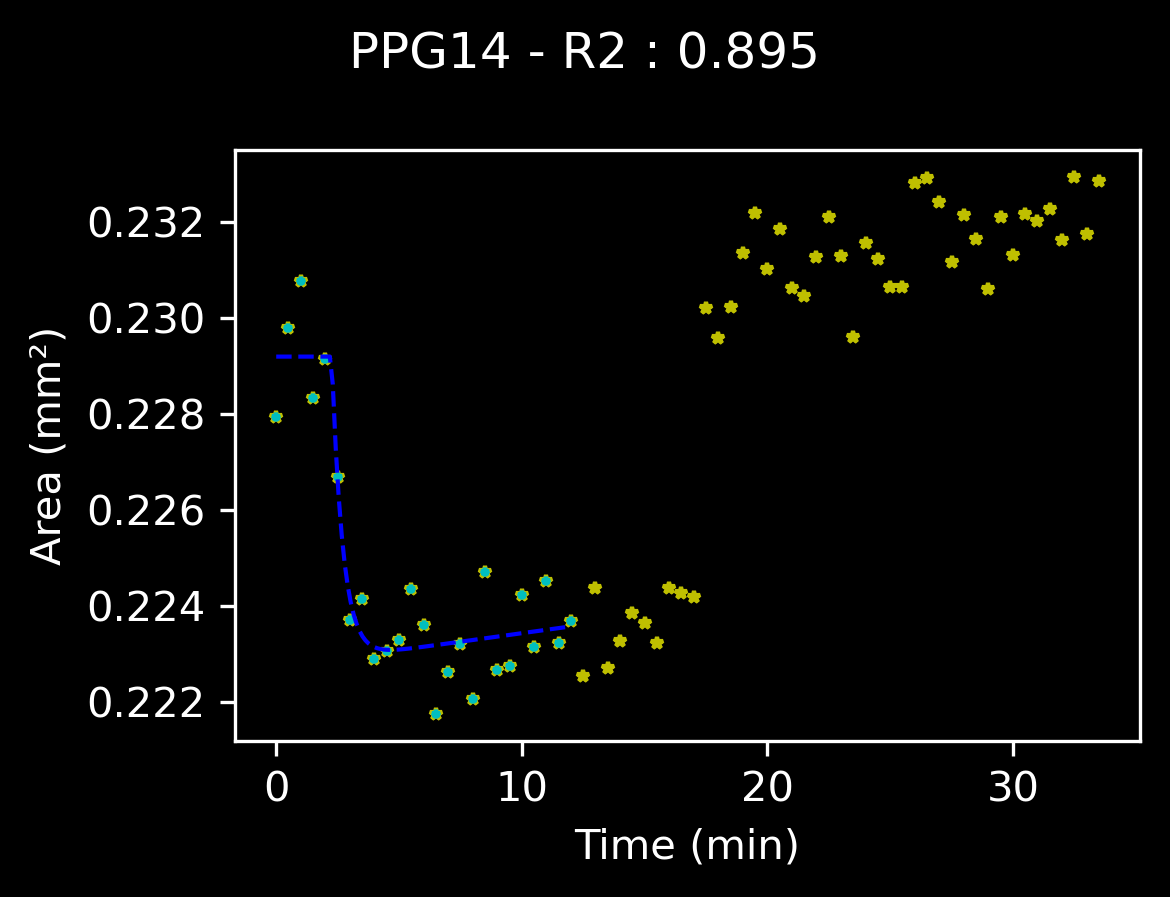

Fitting curve for : PPG15


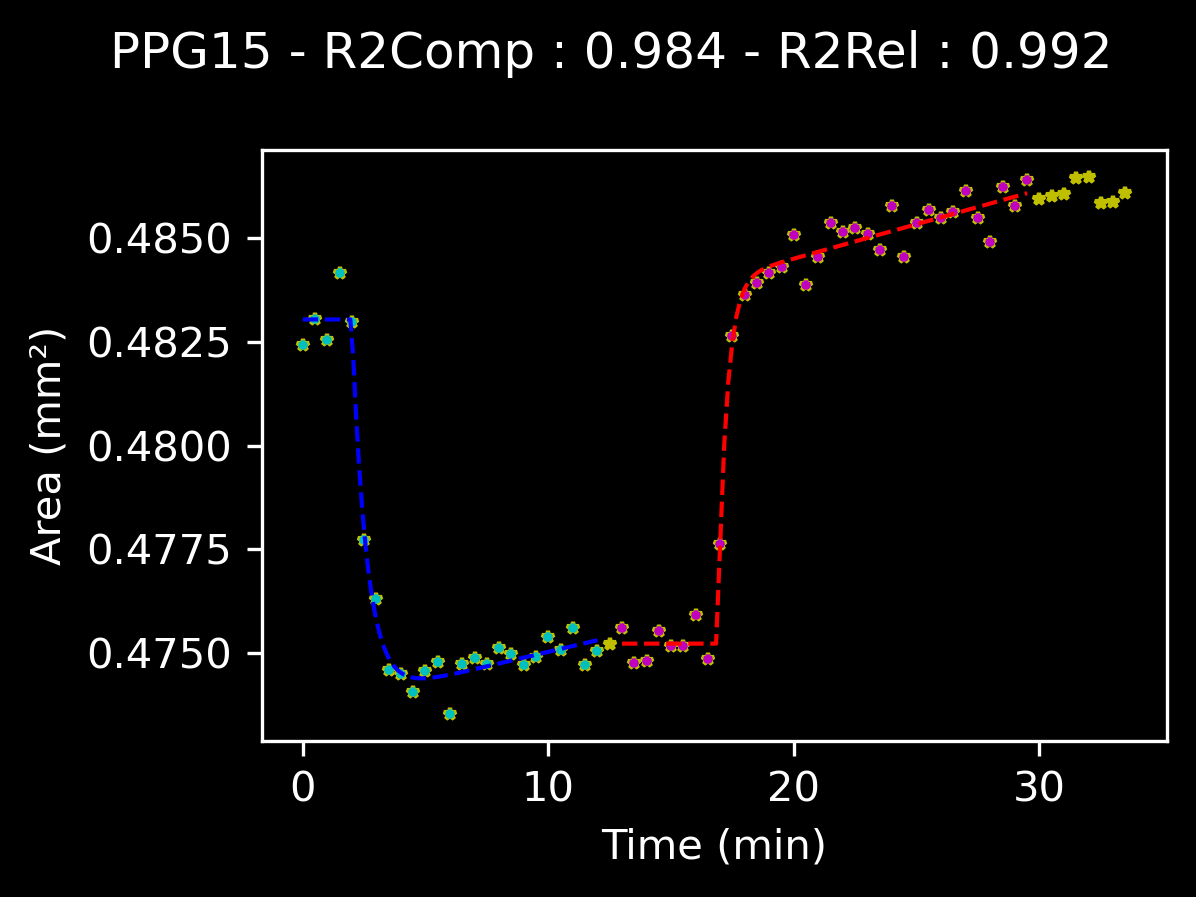

Fitting curve for : PPG16


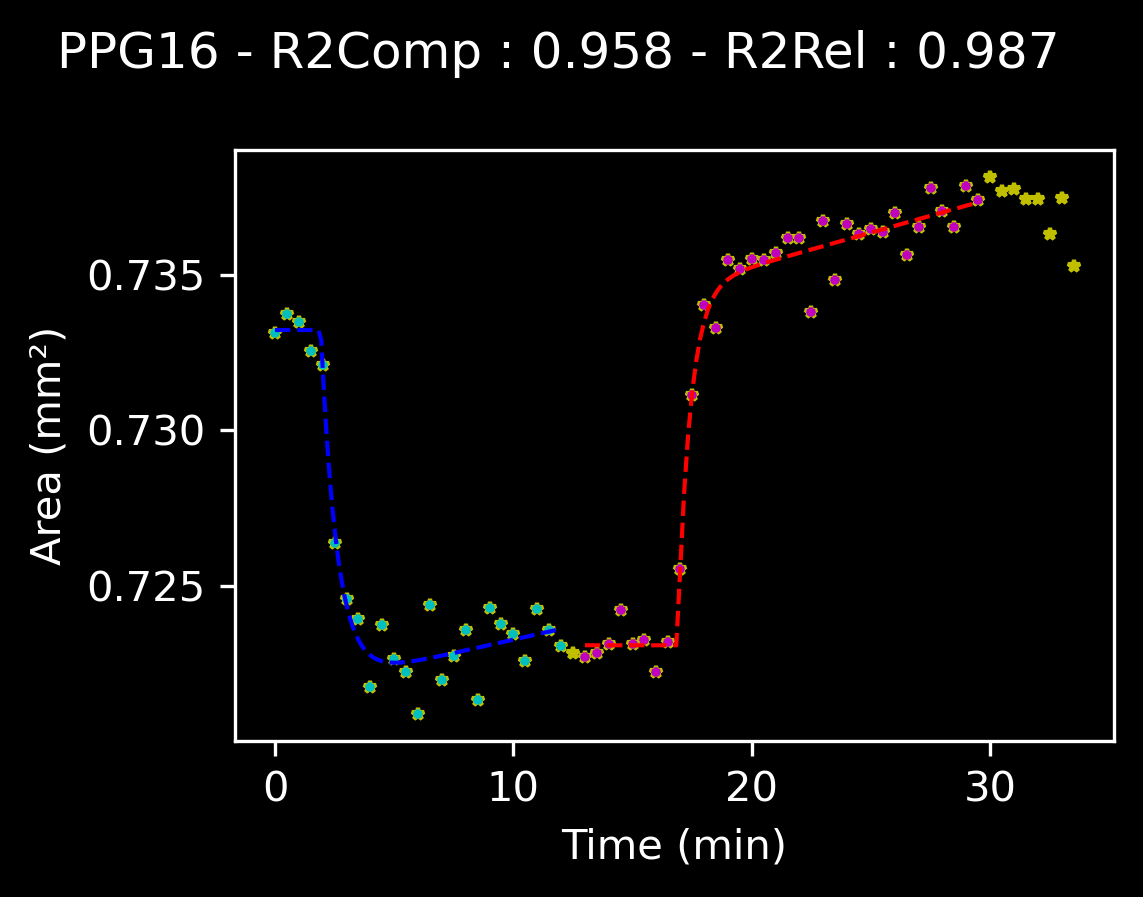

Fitting curve for : PPG17


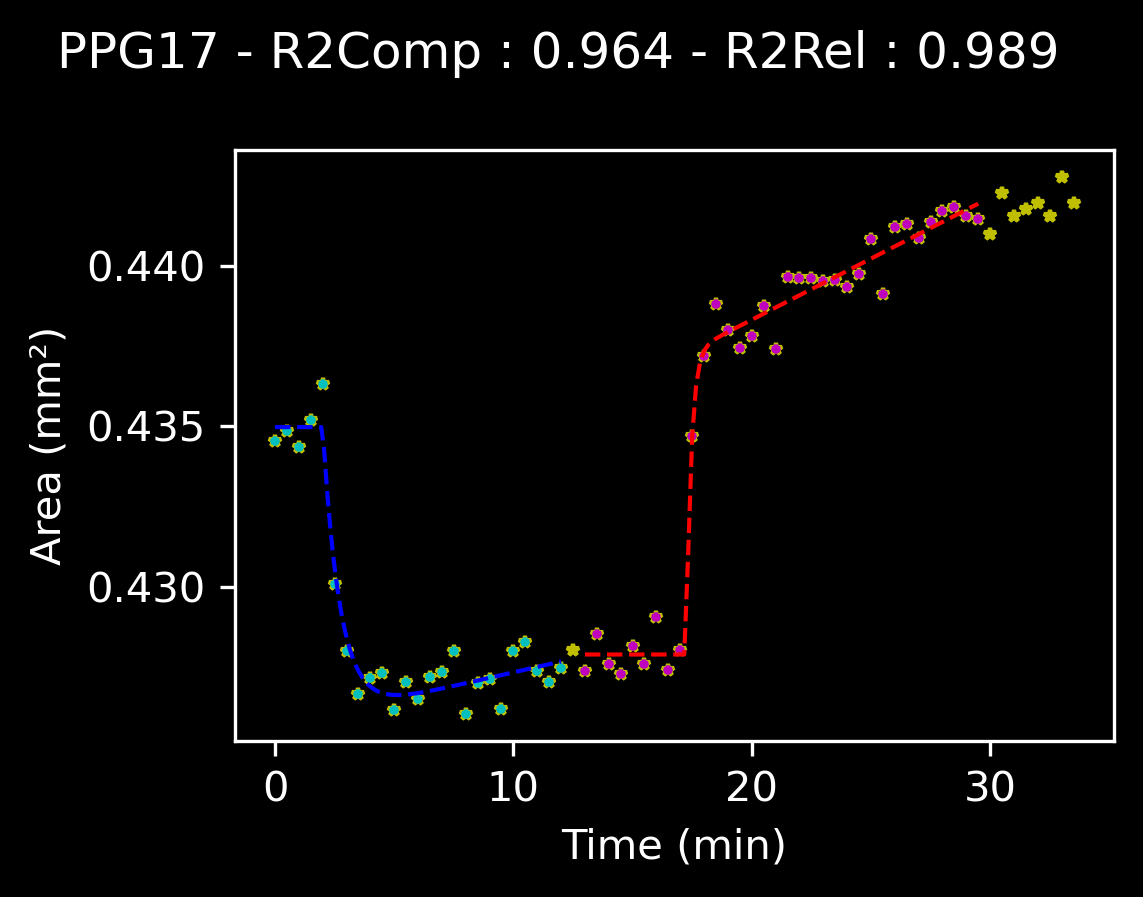

Fitting curve for : PPG18


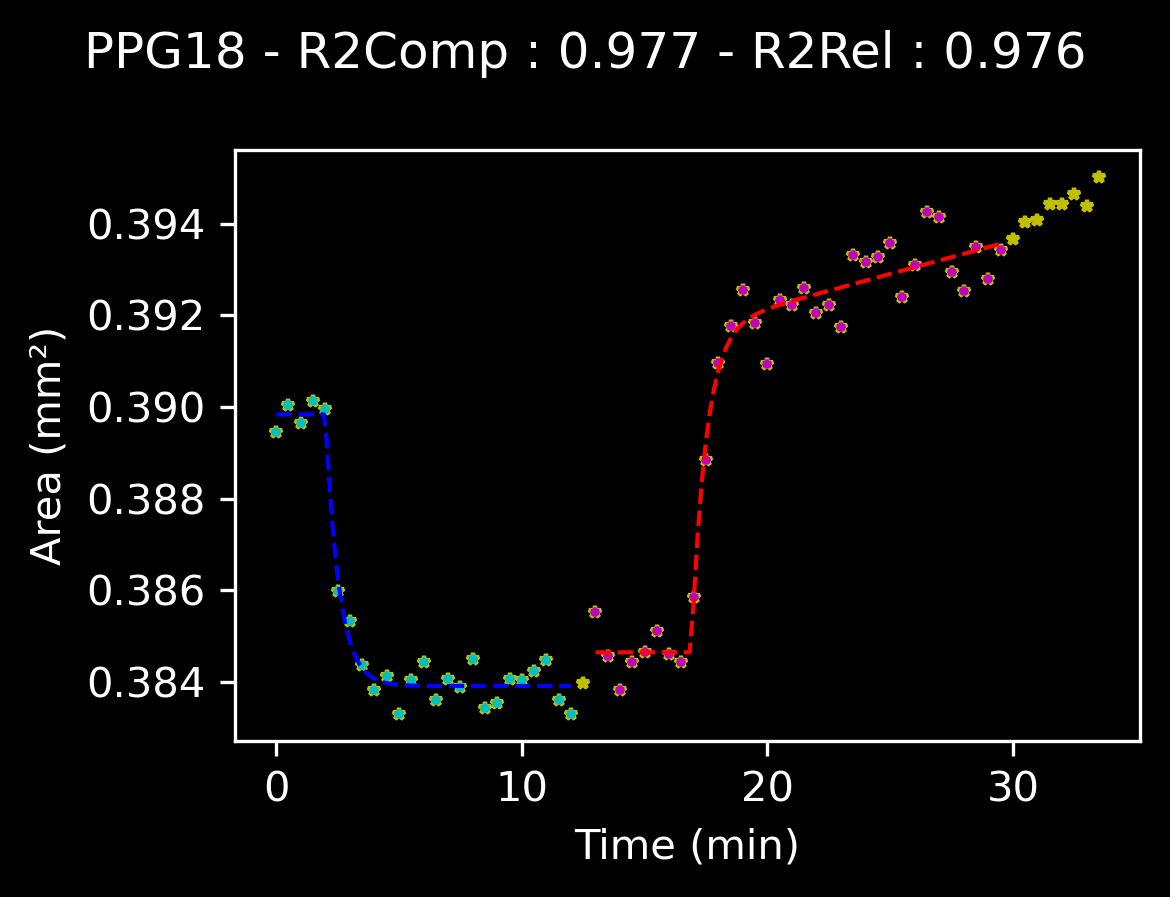

Fitting curve for : PPG19


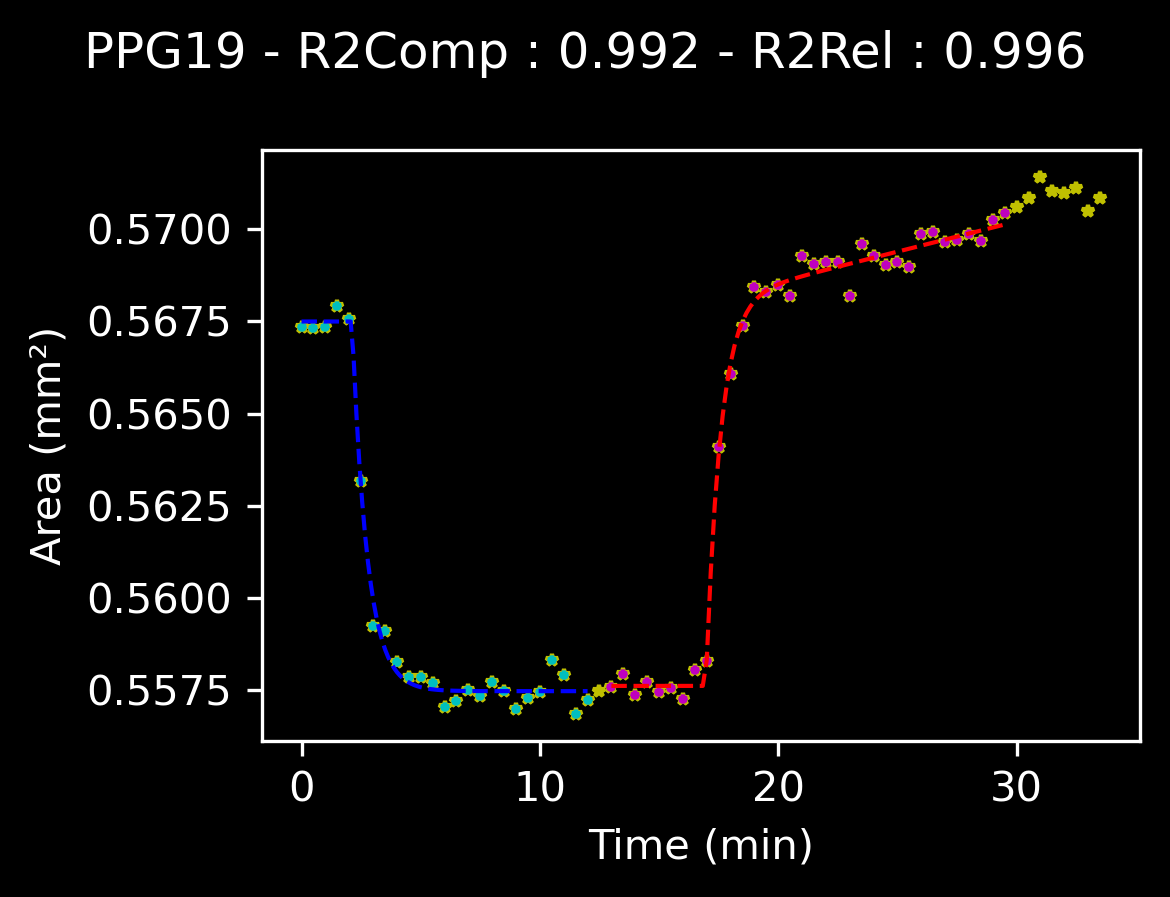

Fitting curve for : PPG20


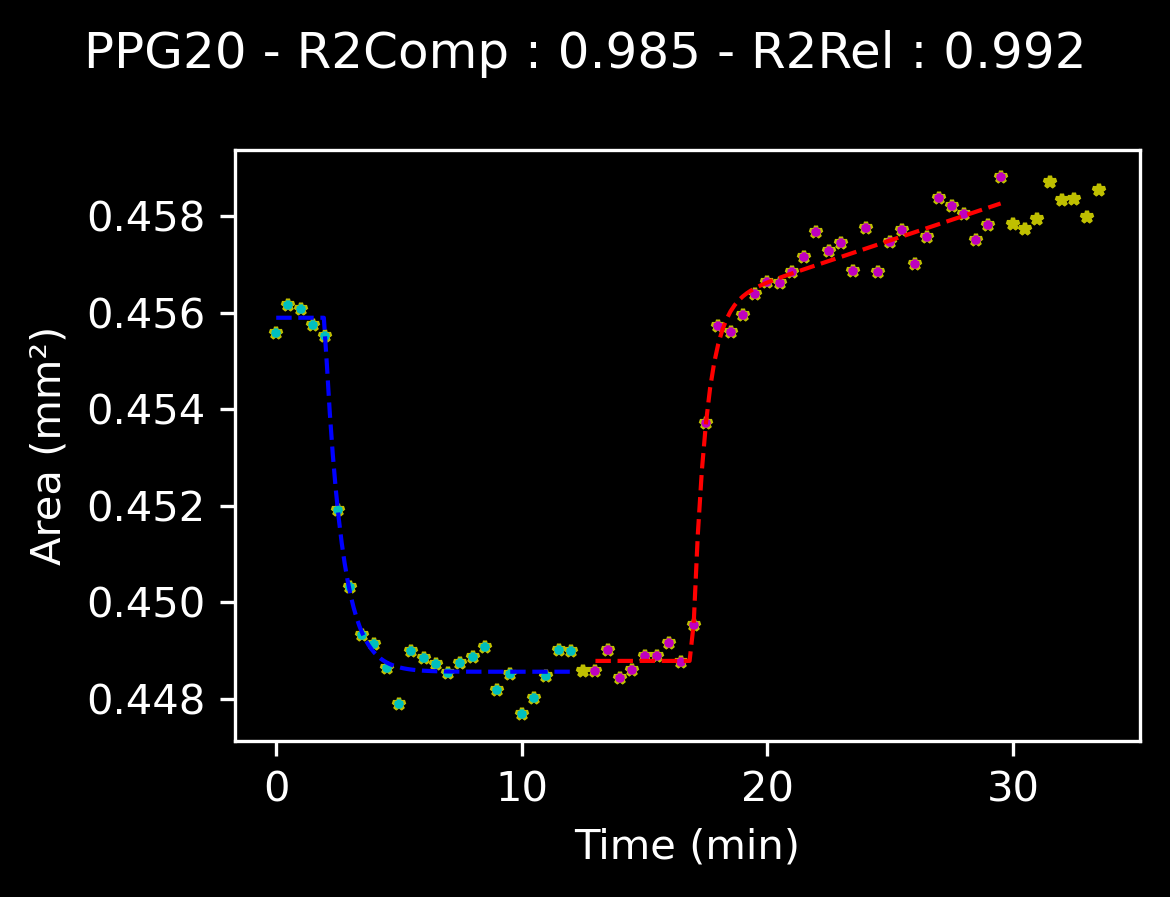

Fitting curve for : PPG21


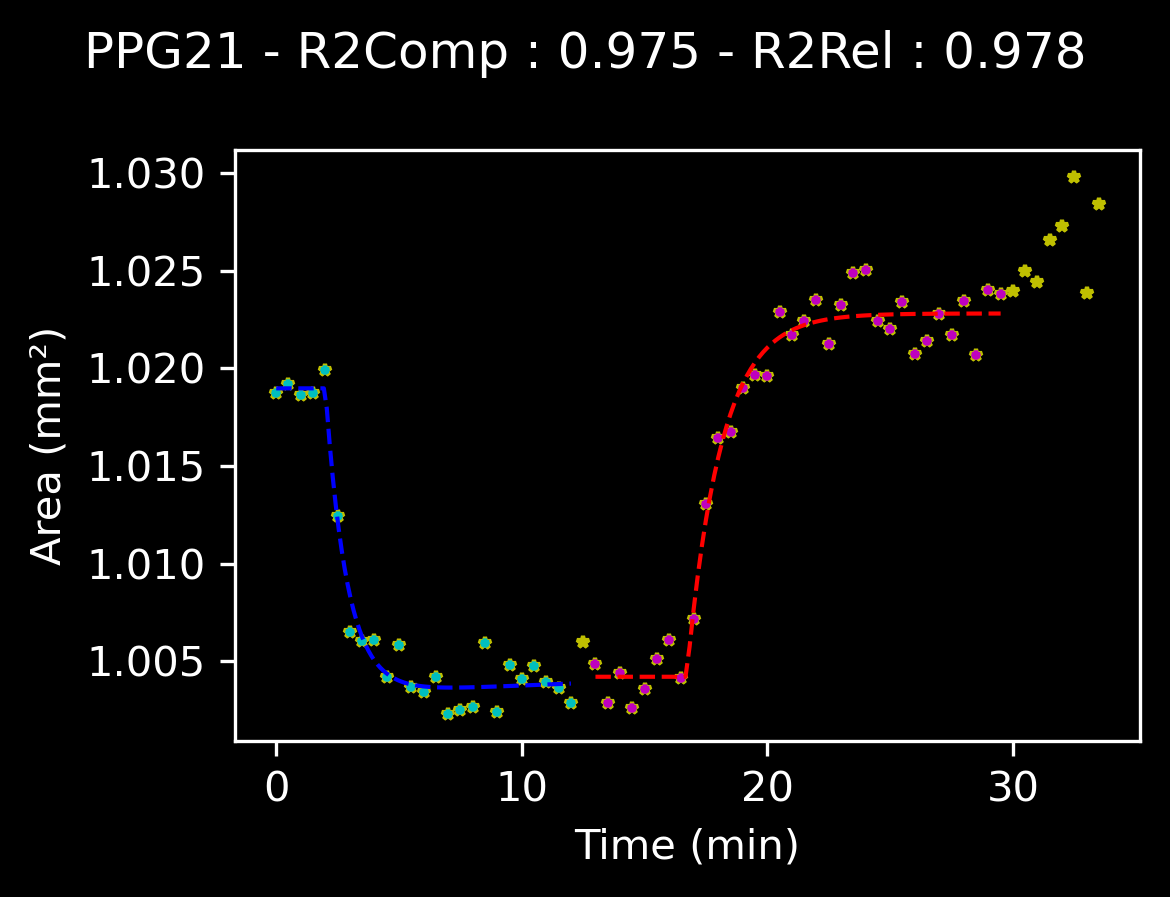

Fitting curve for : PPG22


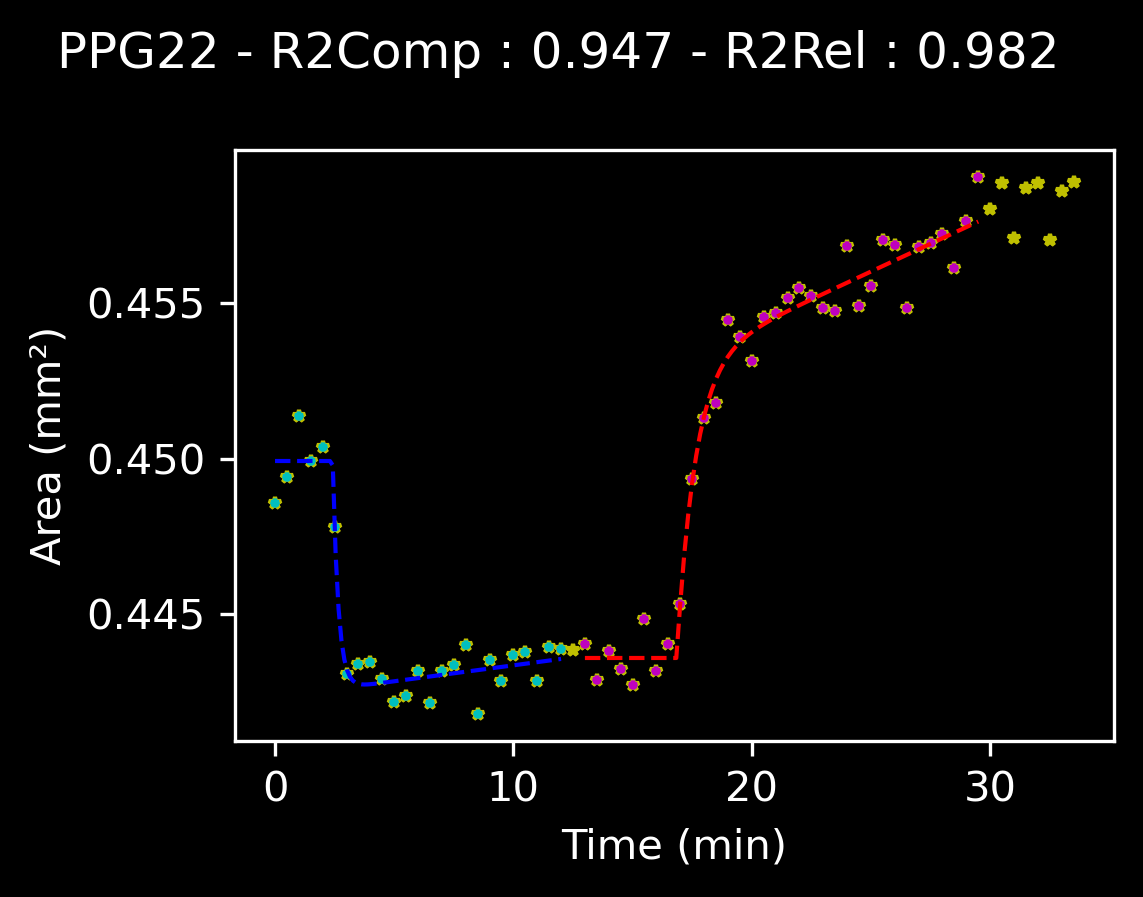

Fitting curve for : PPG23


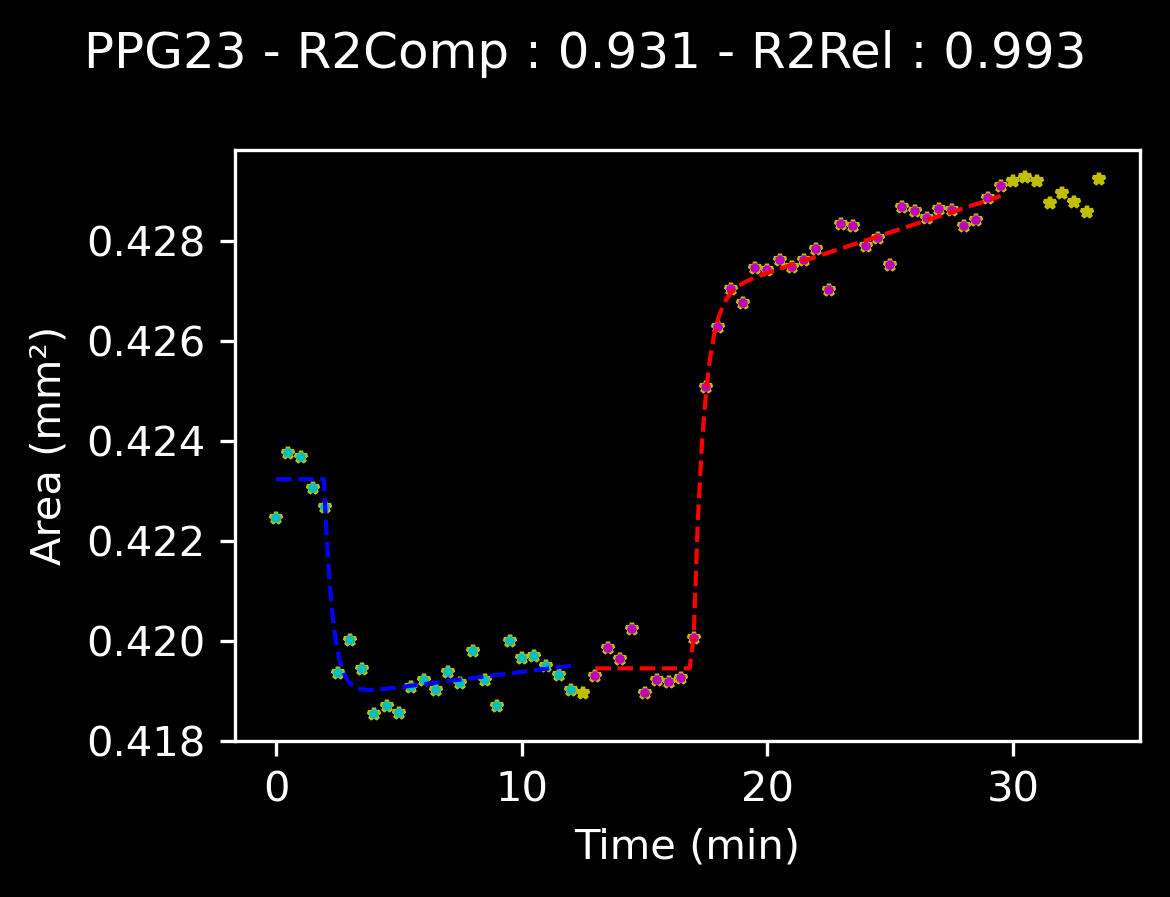

Fitting curve for : PPG24


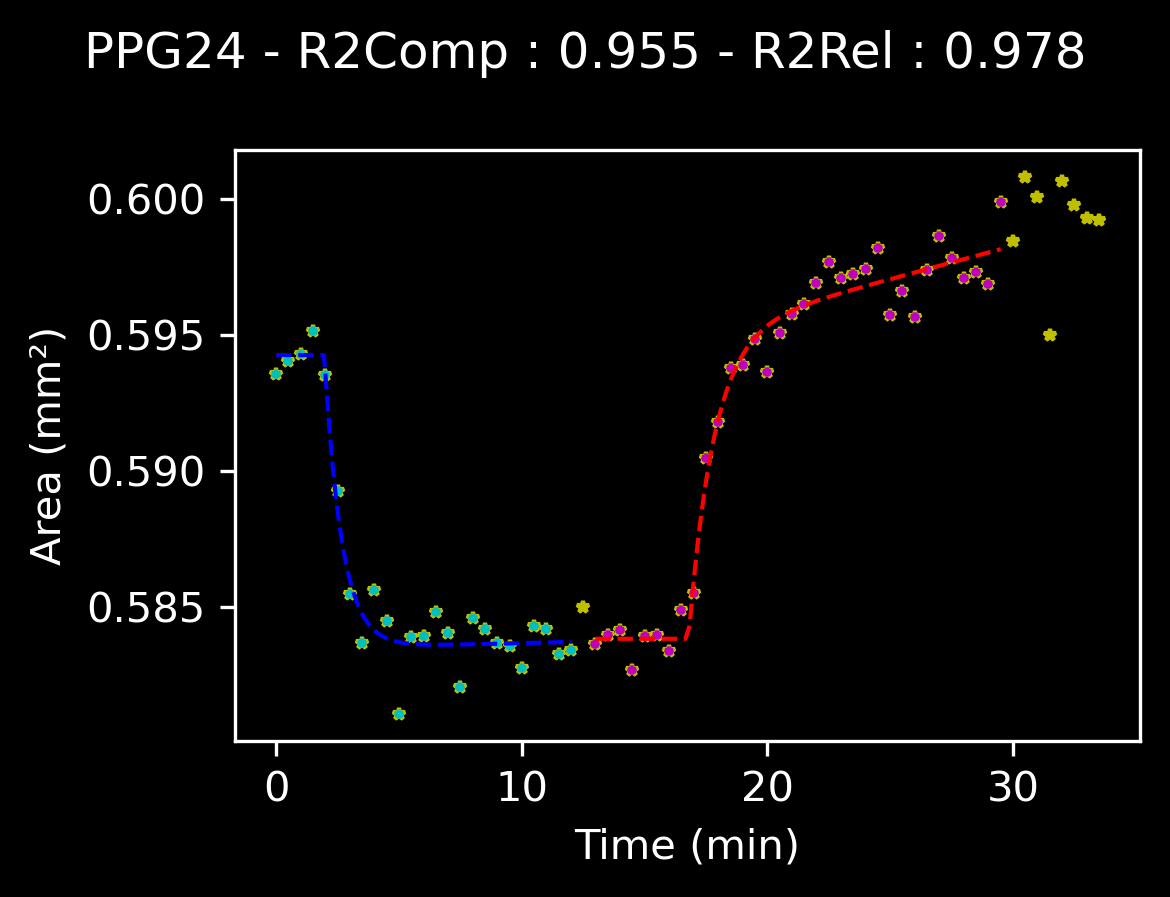

Fitting curve for : PPG25


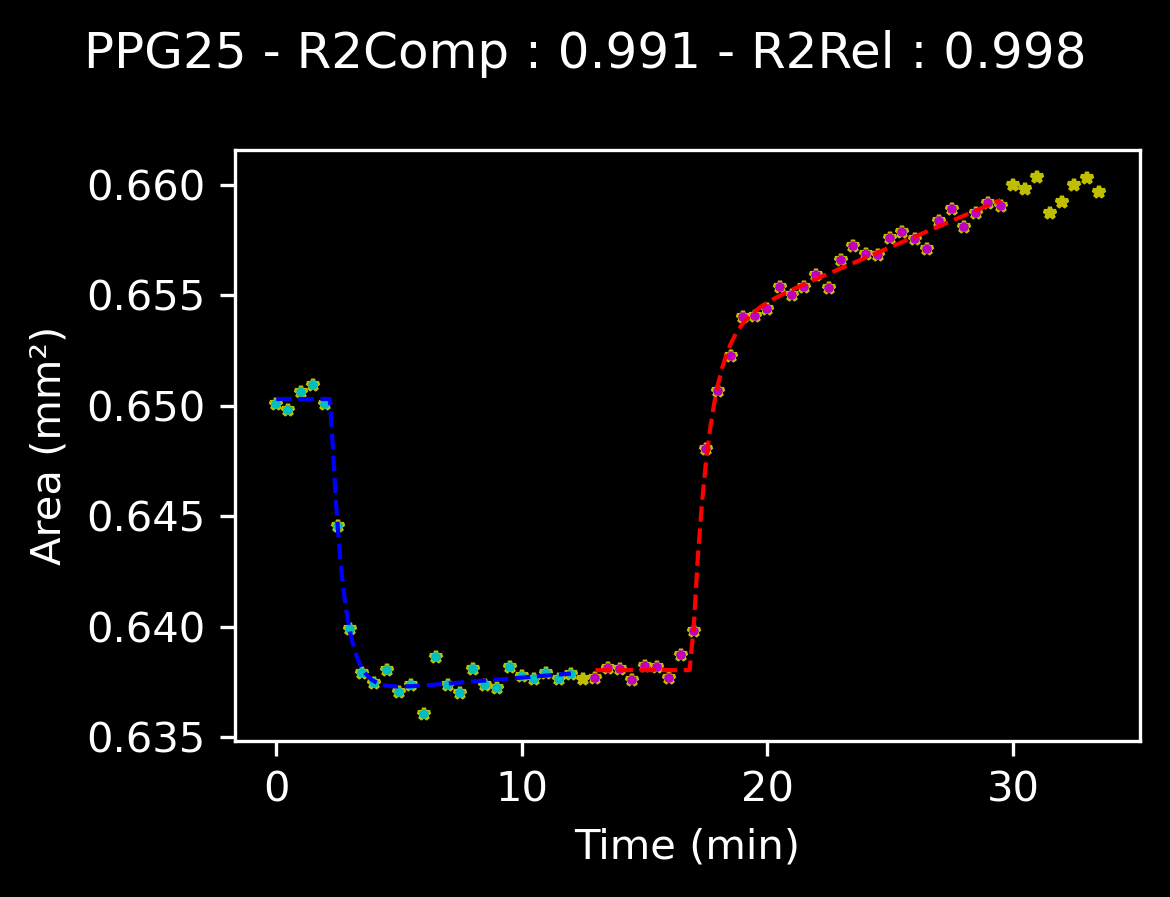

Fitting curve for : PPG26


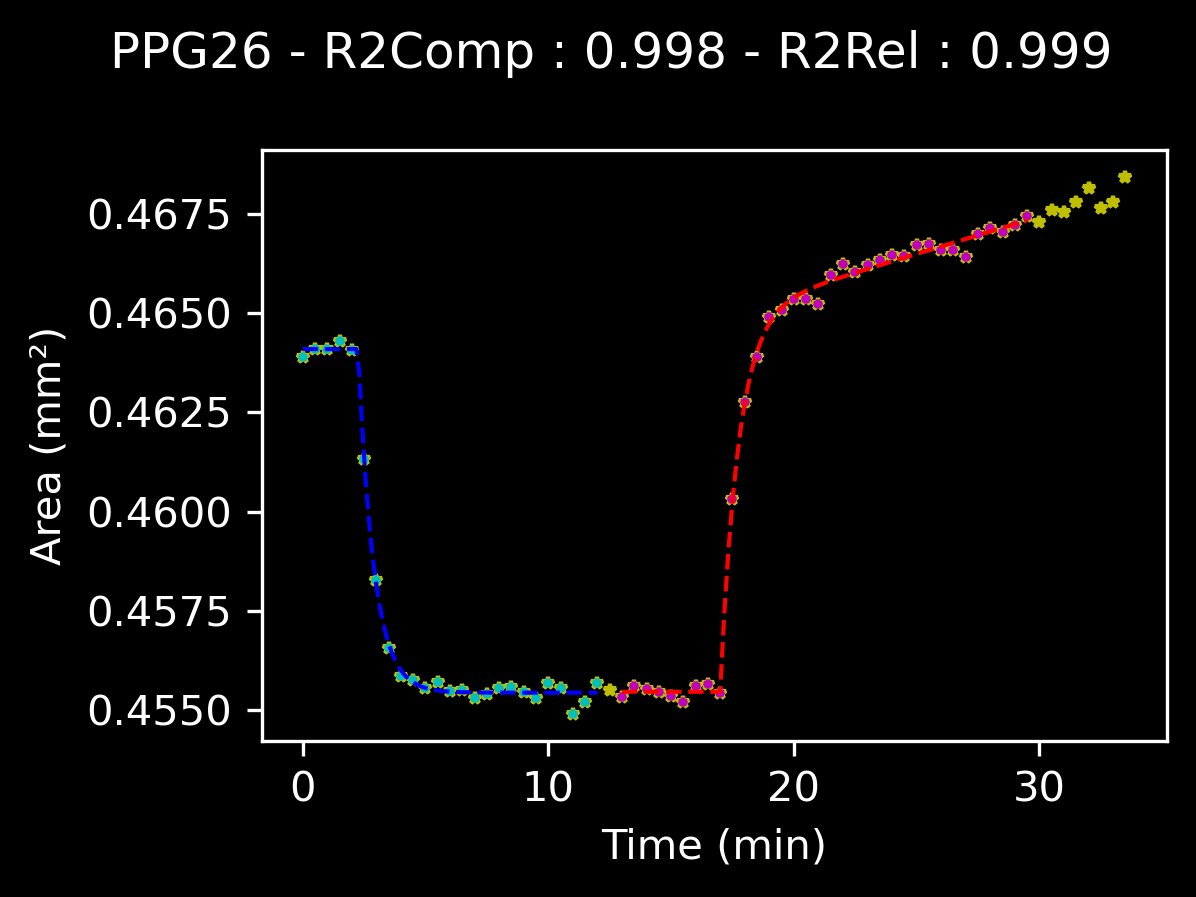

Fitting curve for : PPG27


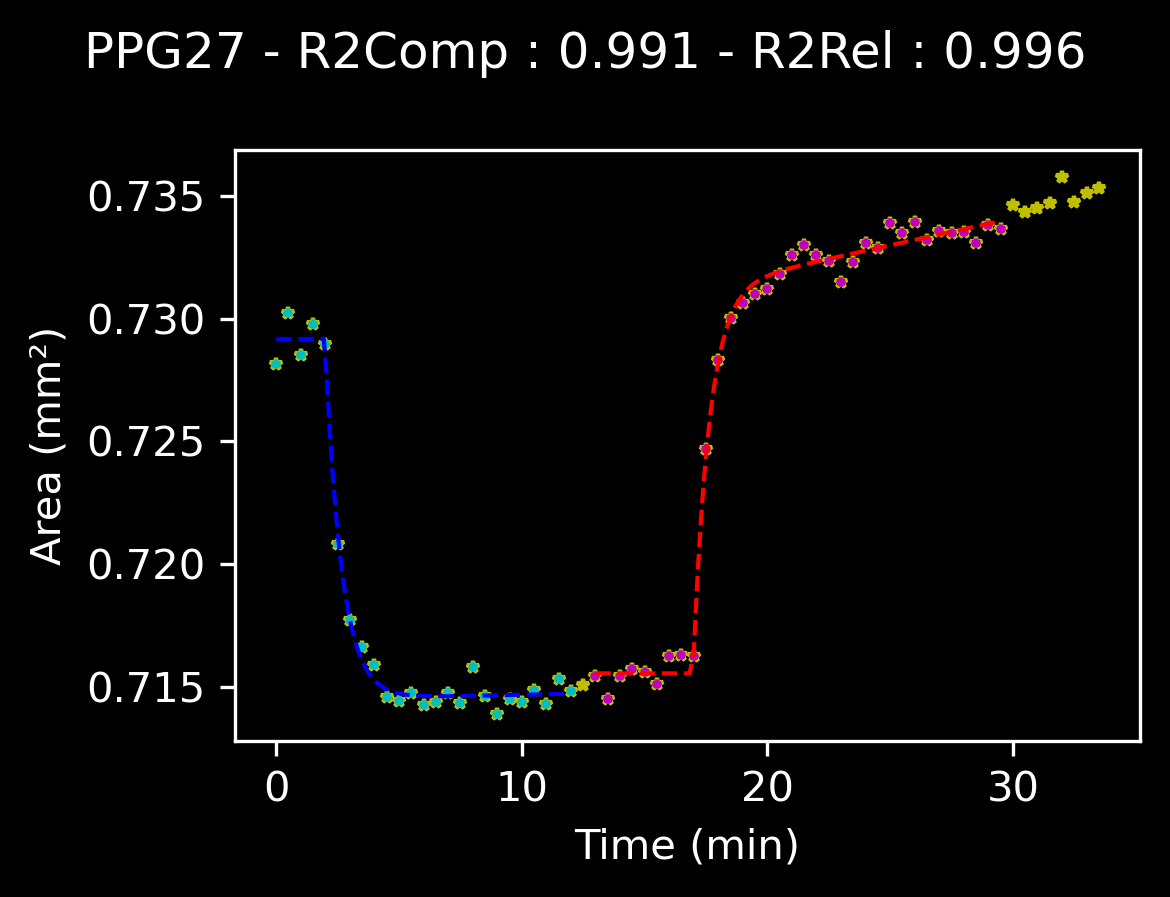

Fitting curve for : PPG28


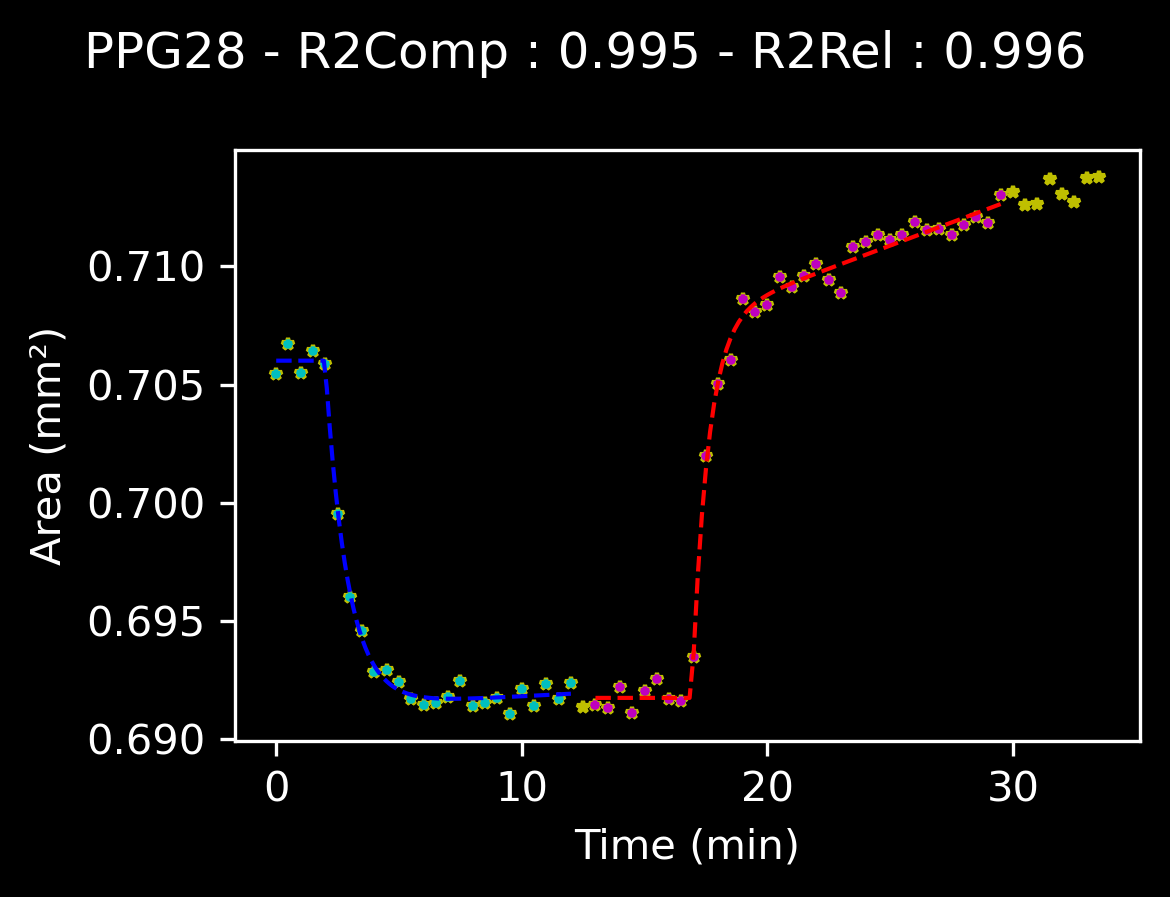

Fitting curve for : PPG29


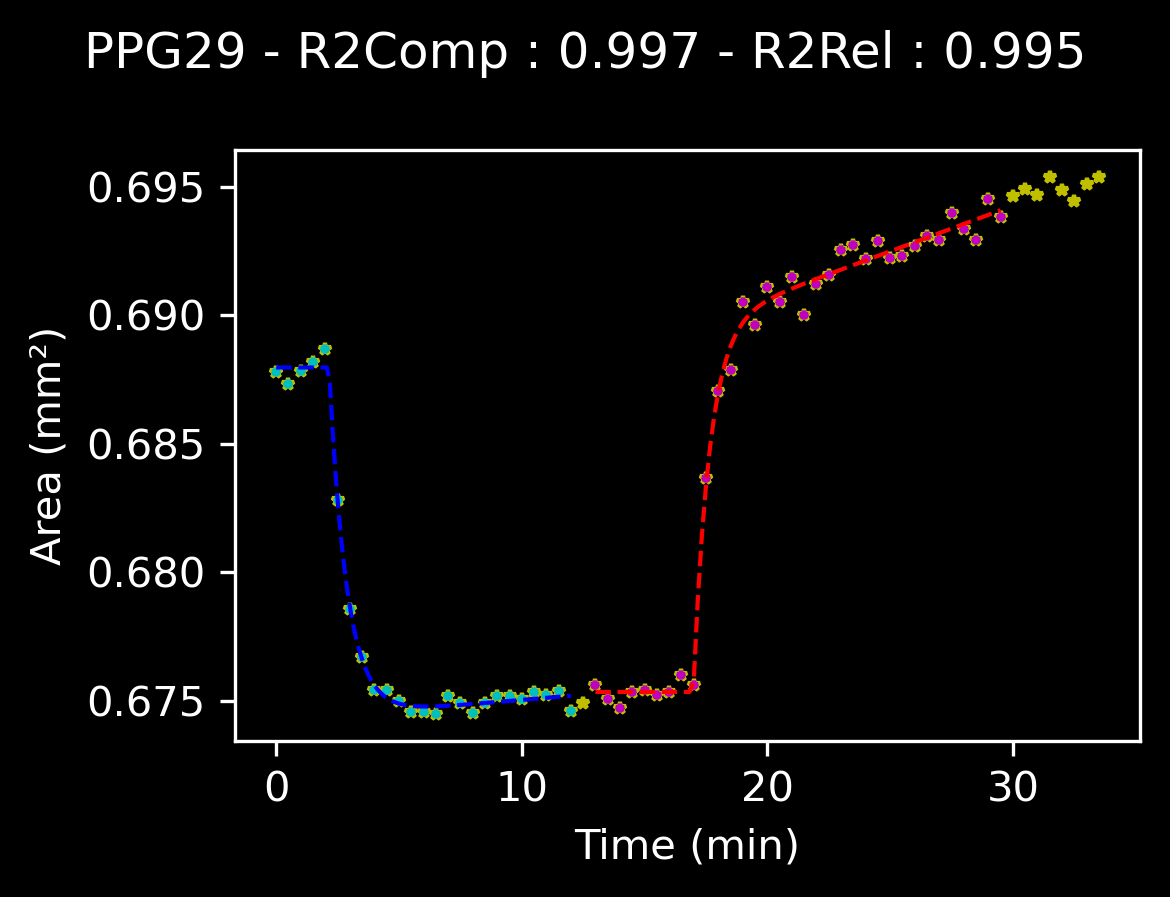

Fitting curve for : PPG30


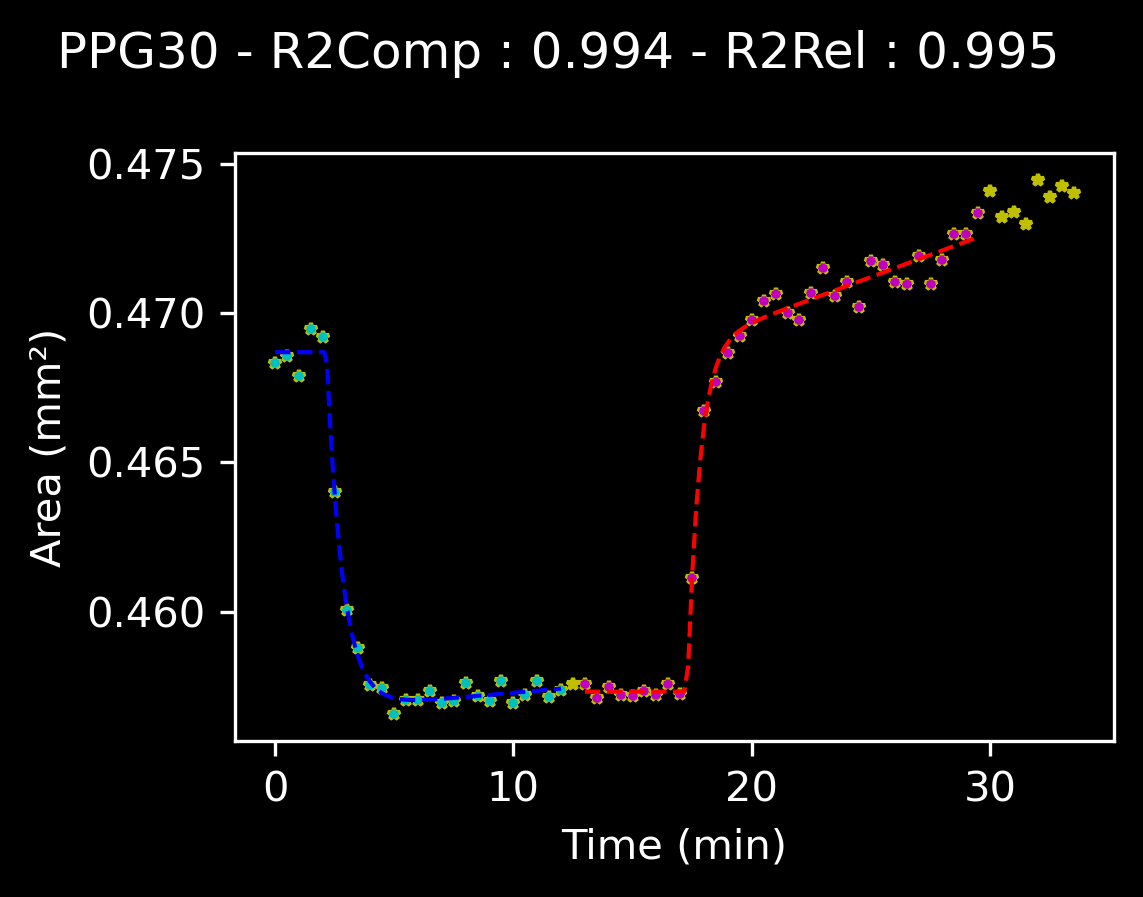

Fitting curve for : PPG31


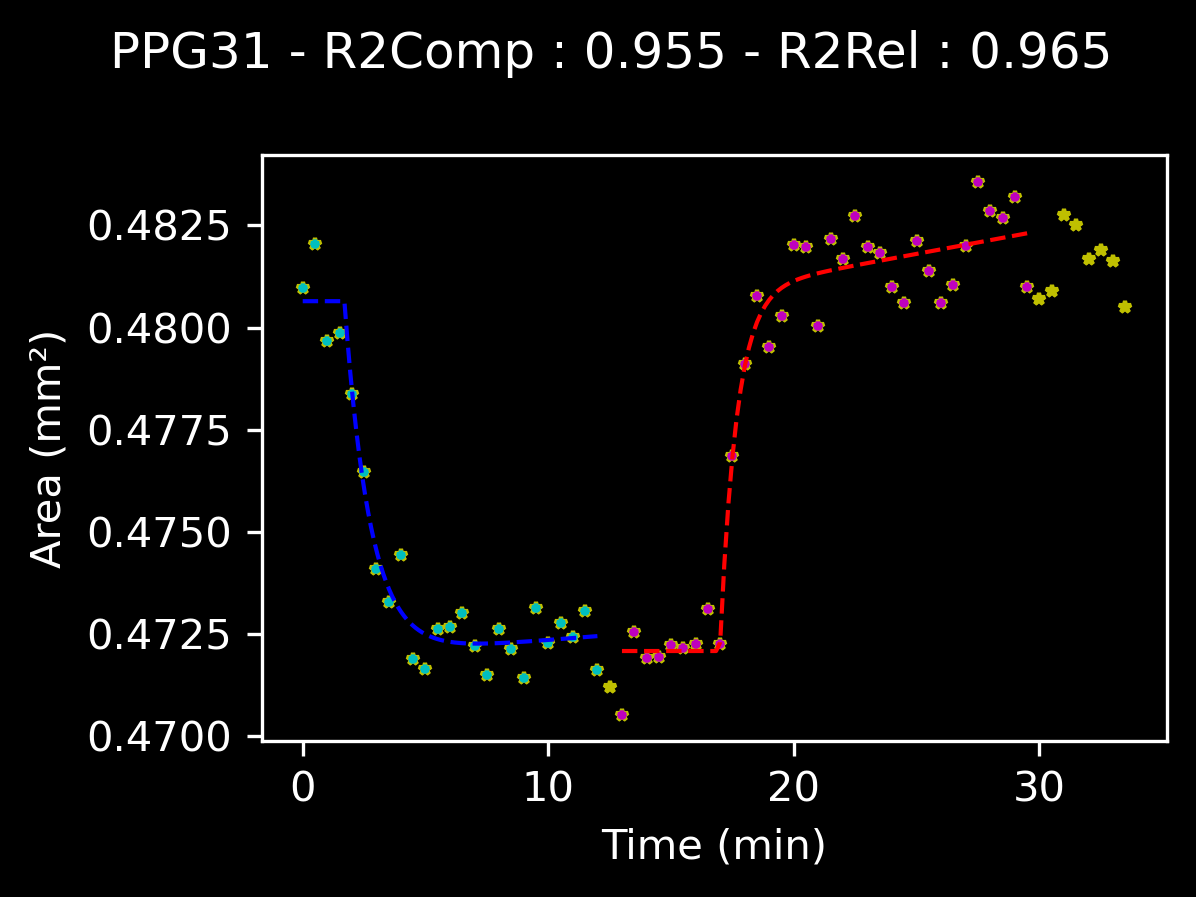

Fitting curve for : PPG32


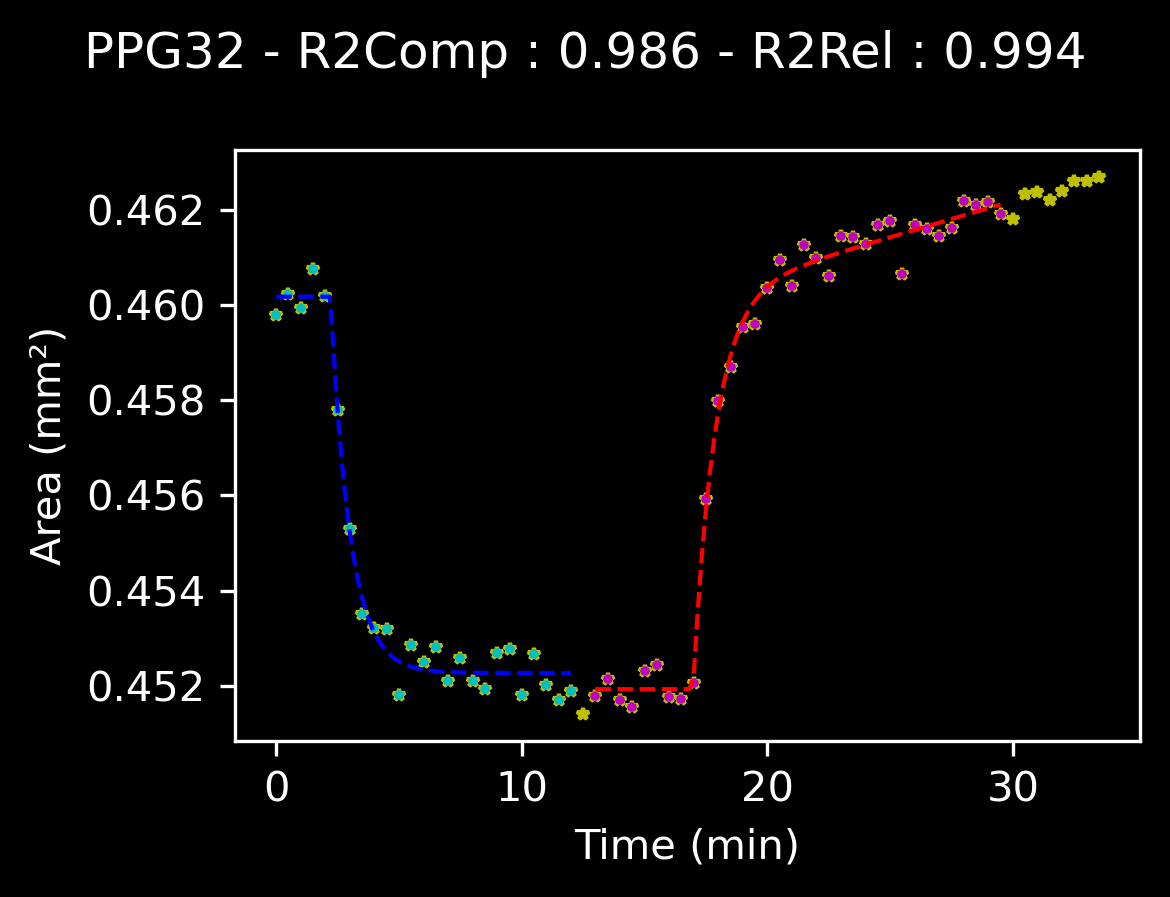

Fitting curve for : PPG33


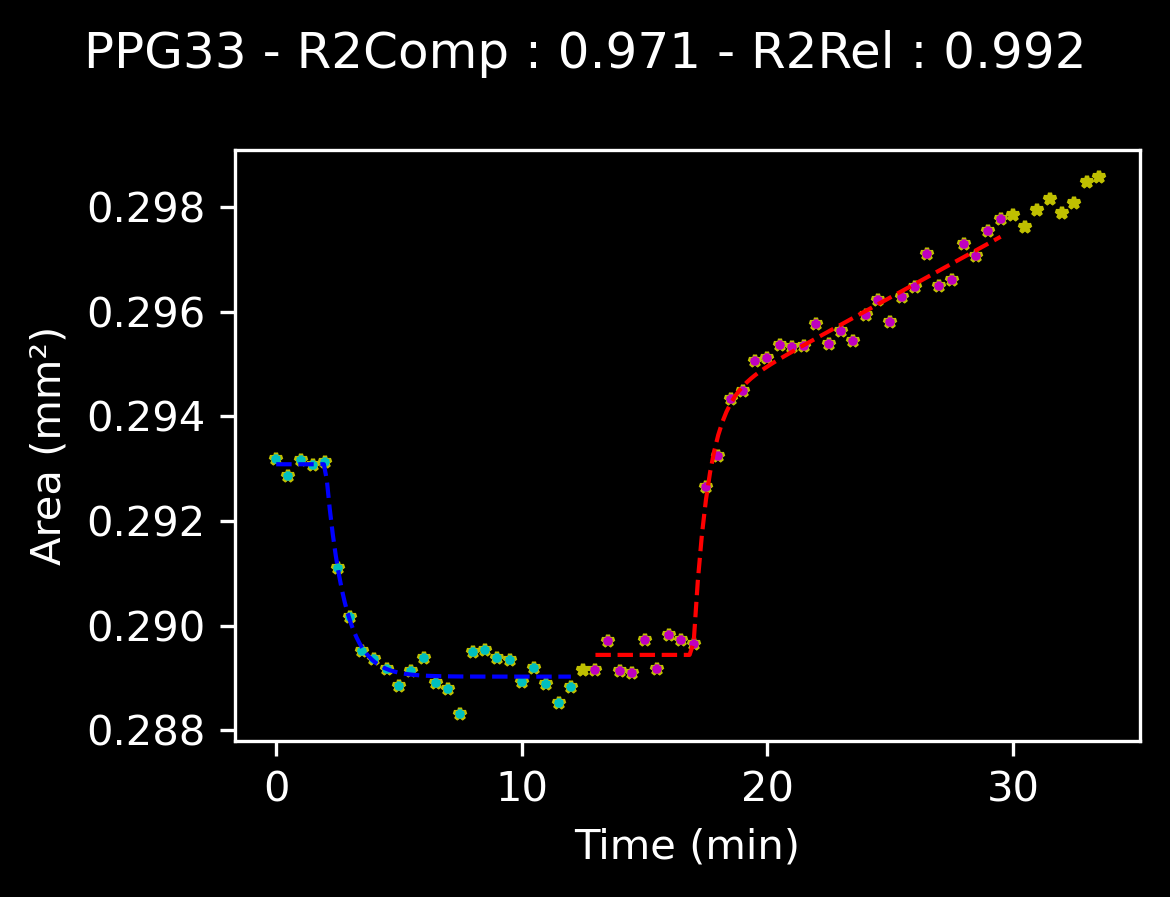

Fitting curve for : PPG34


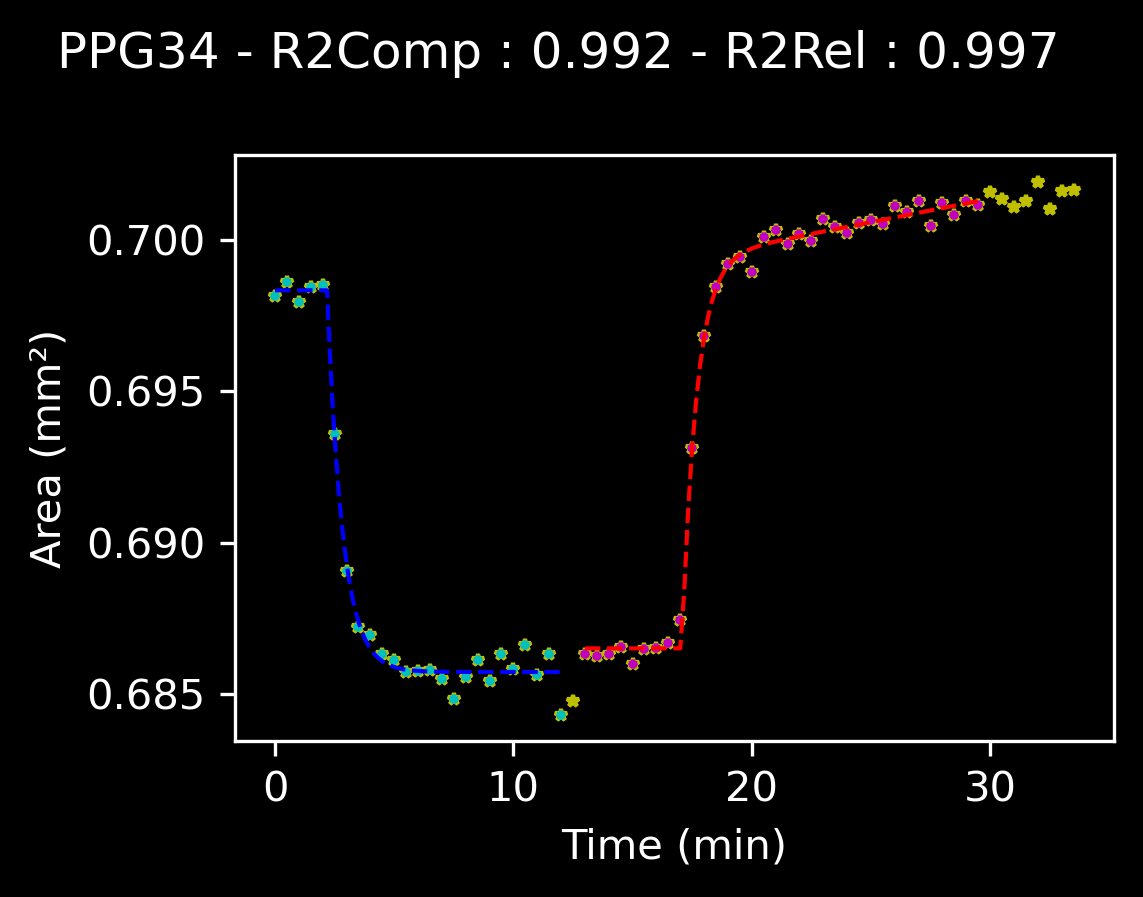

Fitting curve for : PPG35


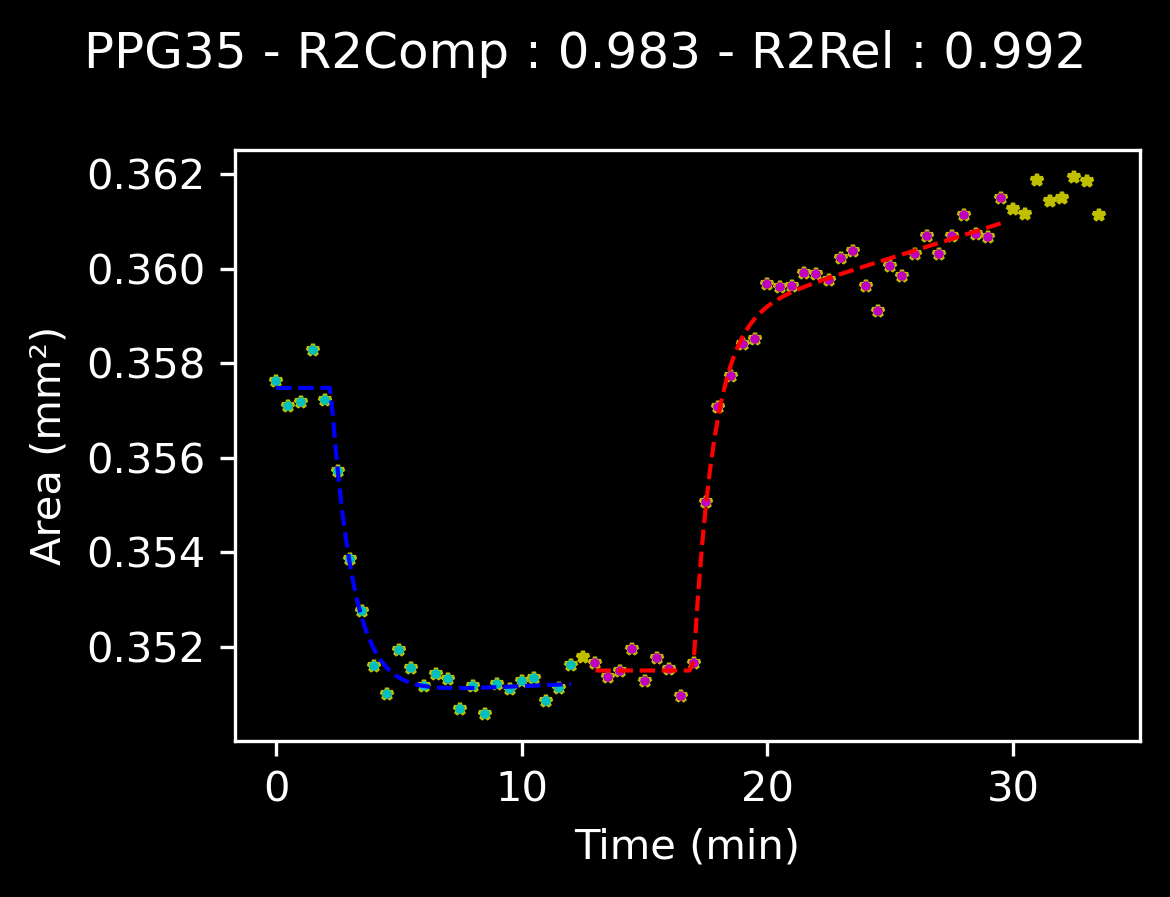

Fitting curve for : PPG36


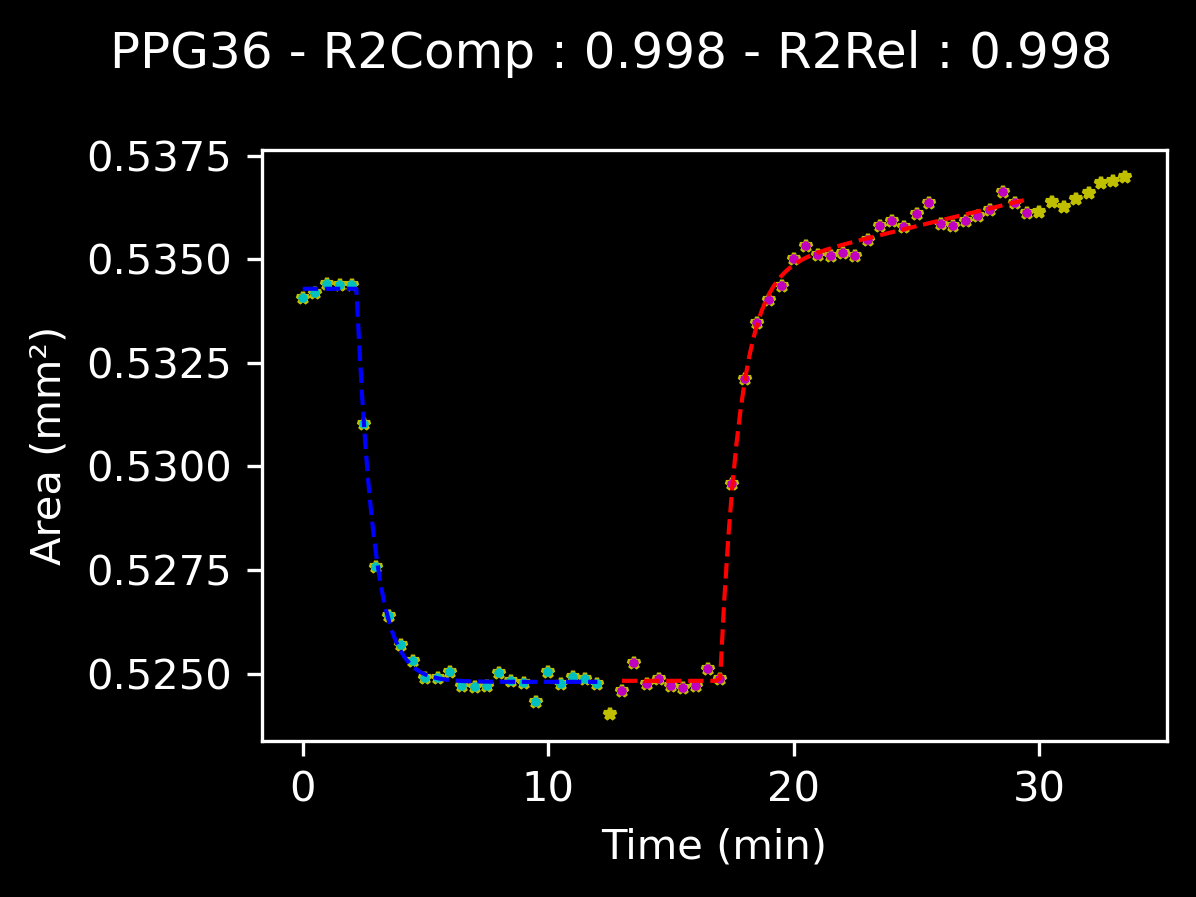

Fitting curve for : PPG37


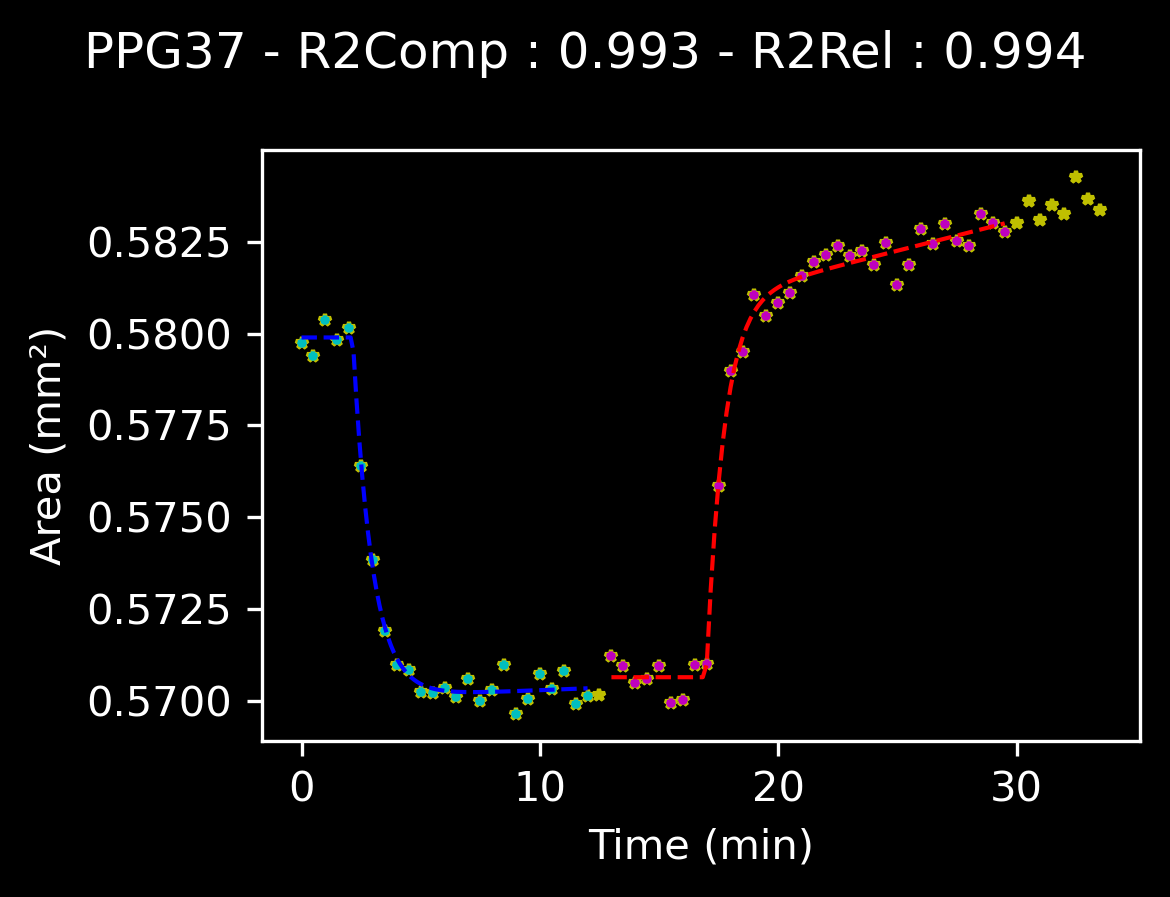

Fitting curve for : PPG38


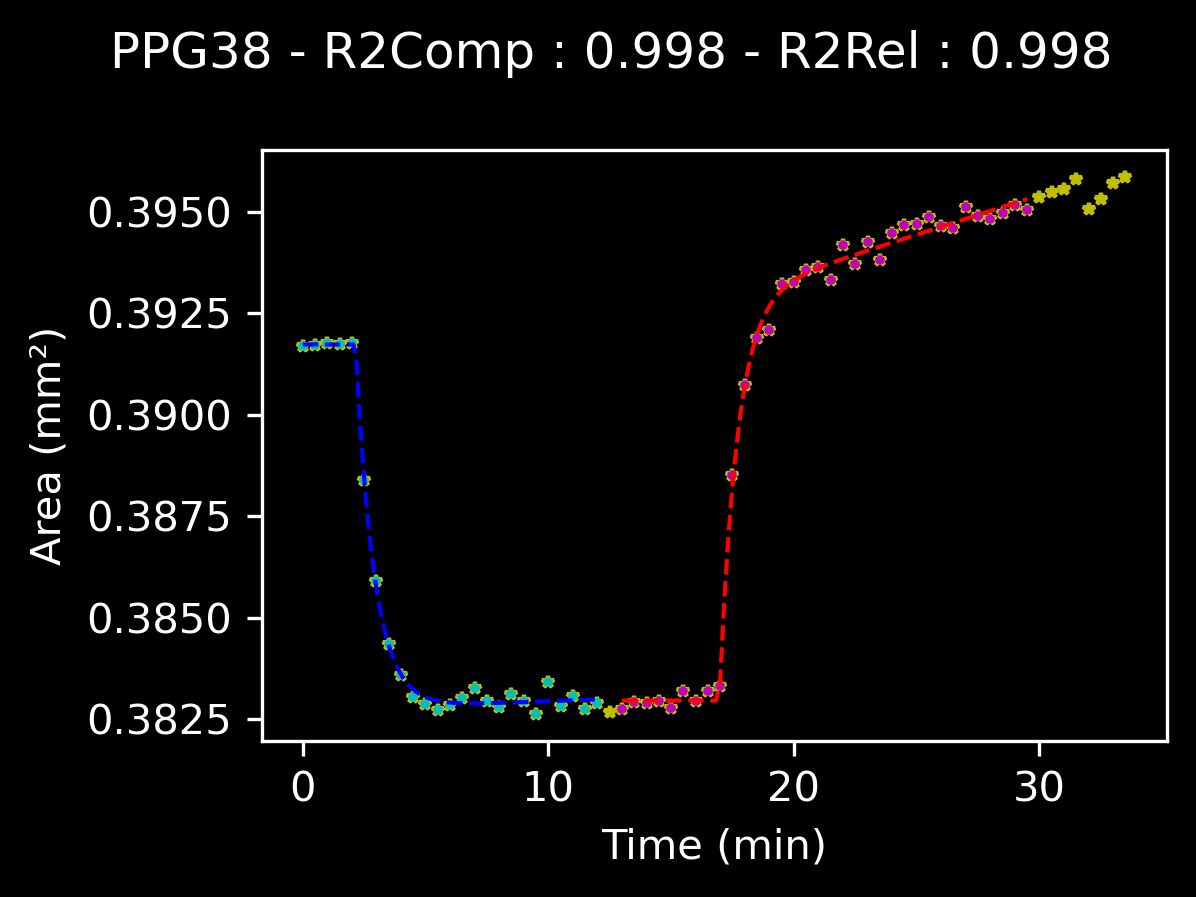

Fitting curve for : PPG39


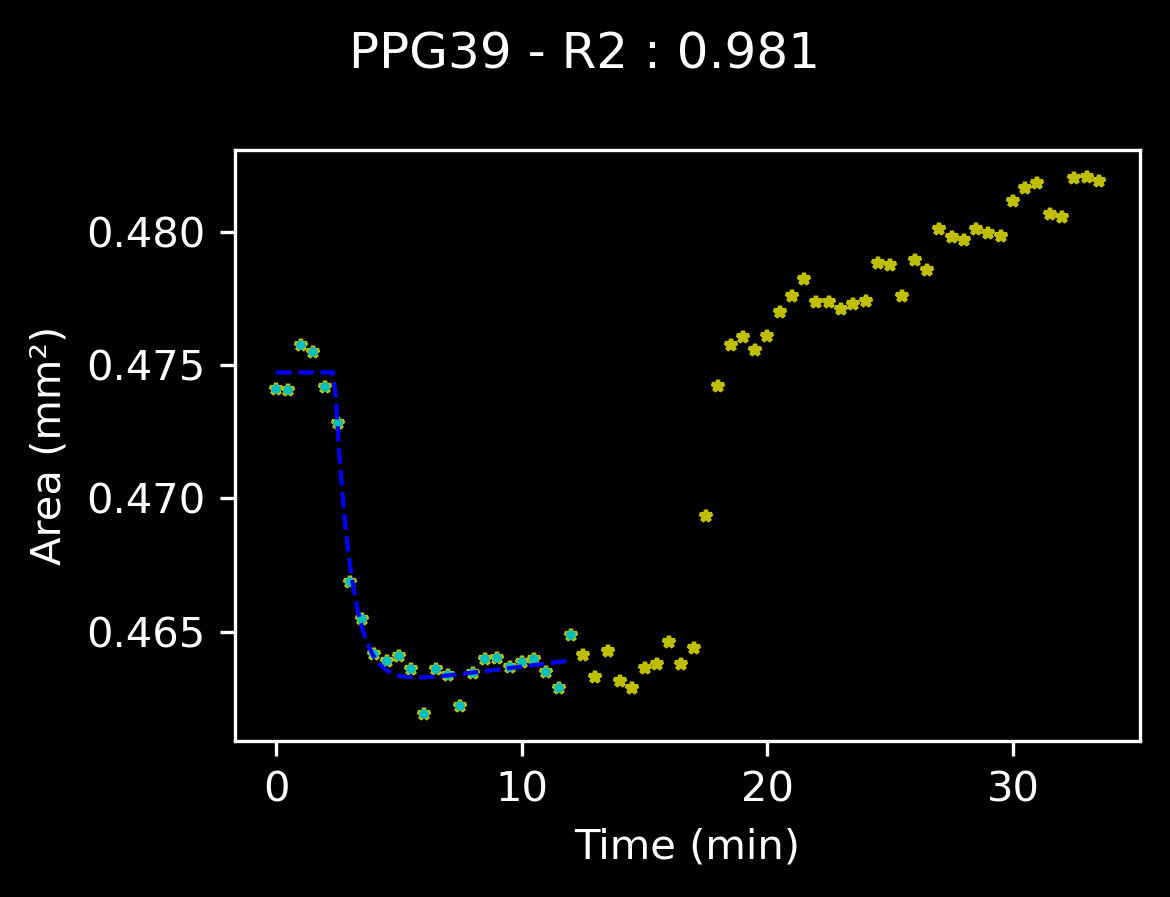

Fitting curve for : PPG40


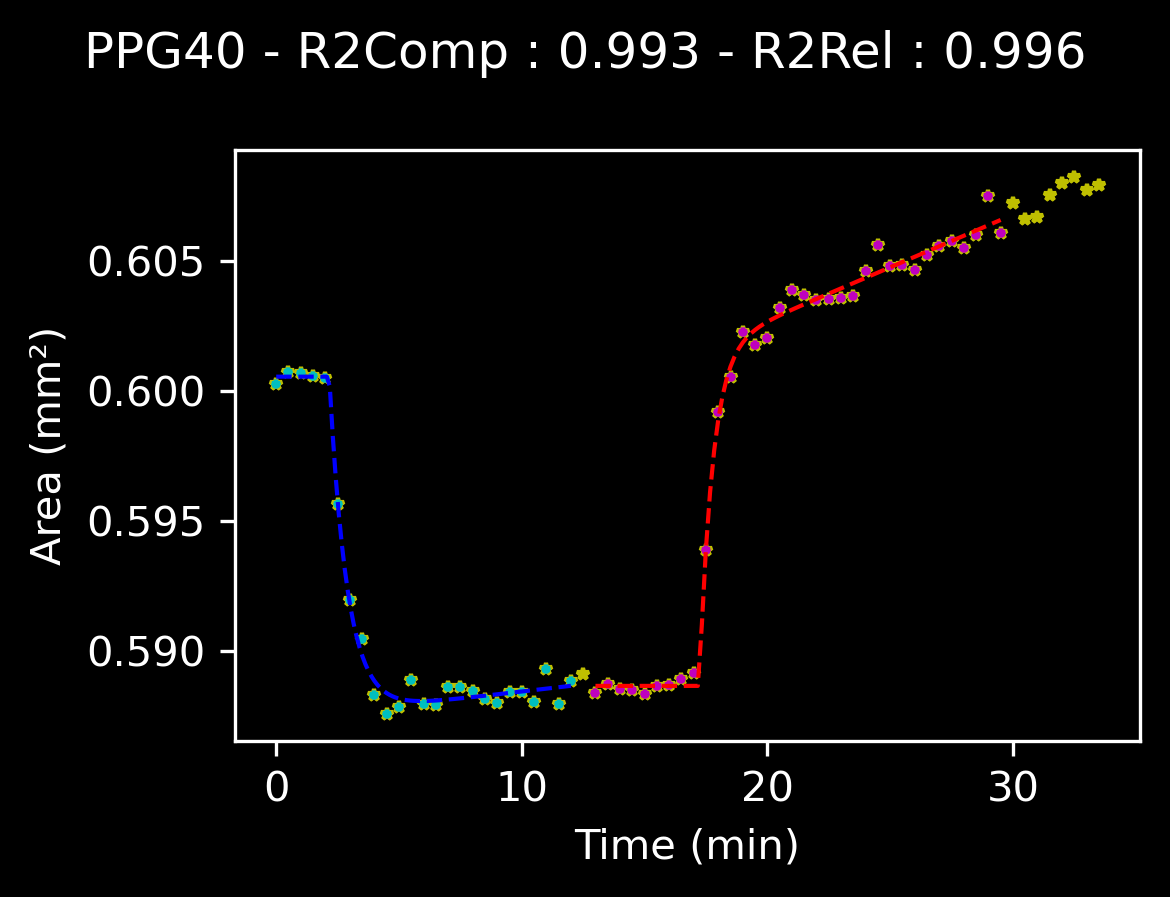

Fitting curve for : PPG41


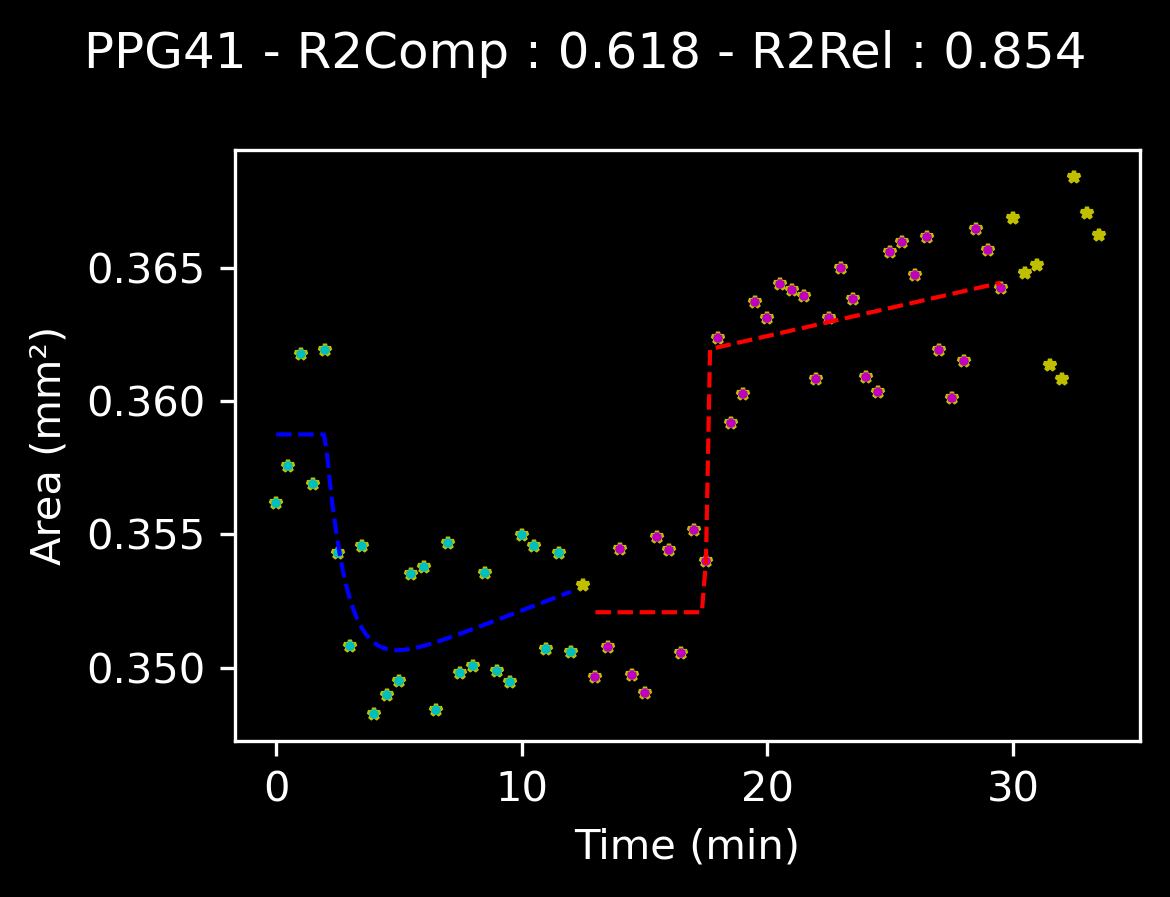

Fitting curve for : PPG42


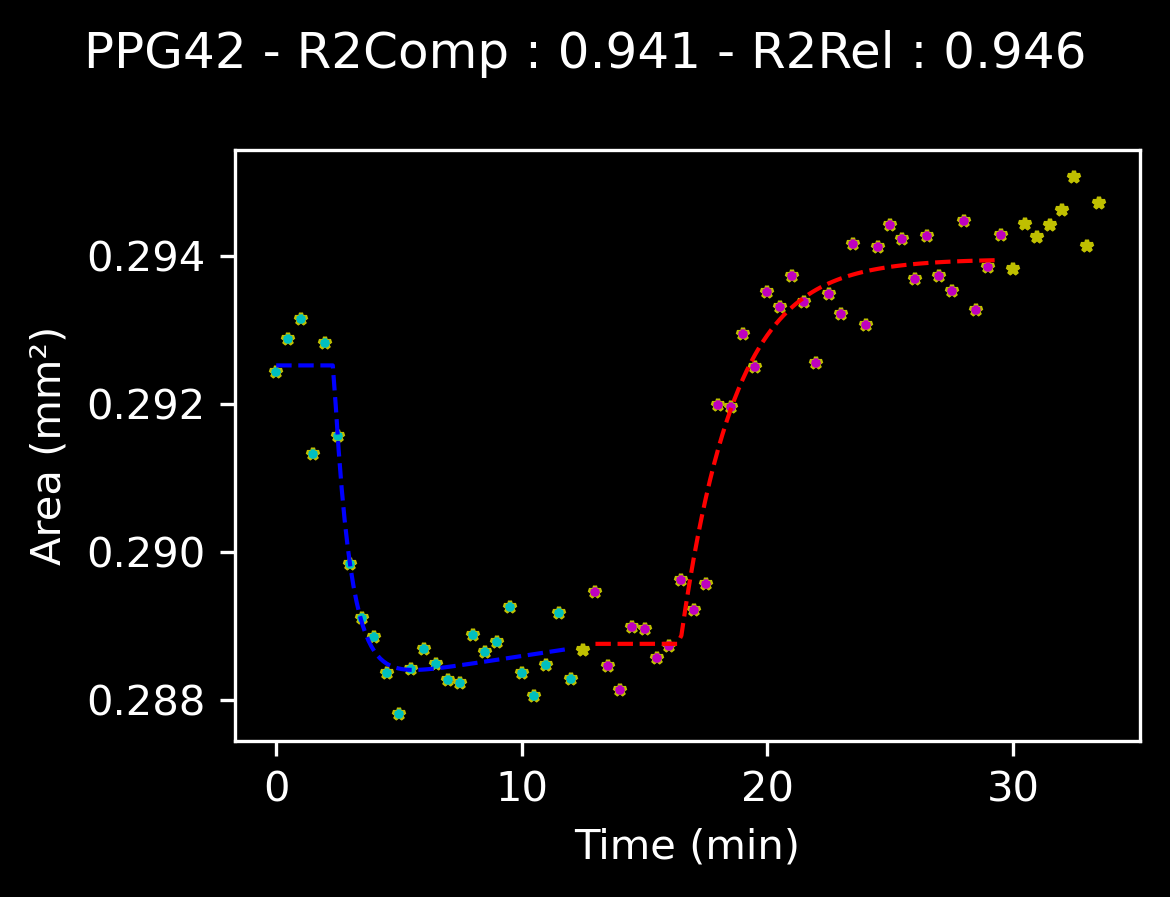

Fitting curve for : PPG43


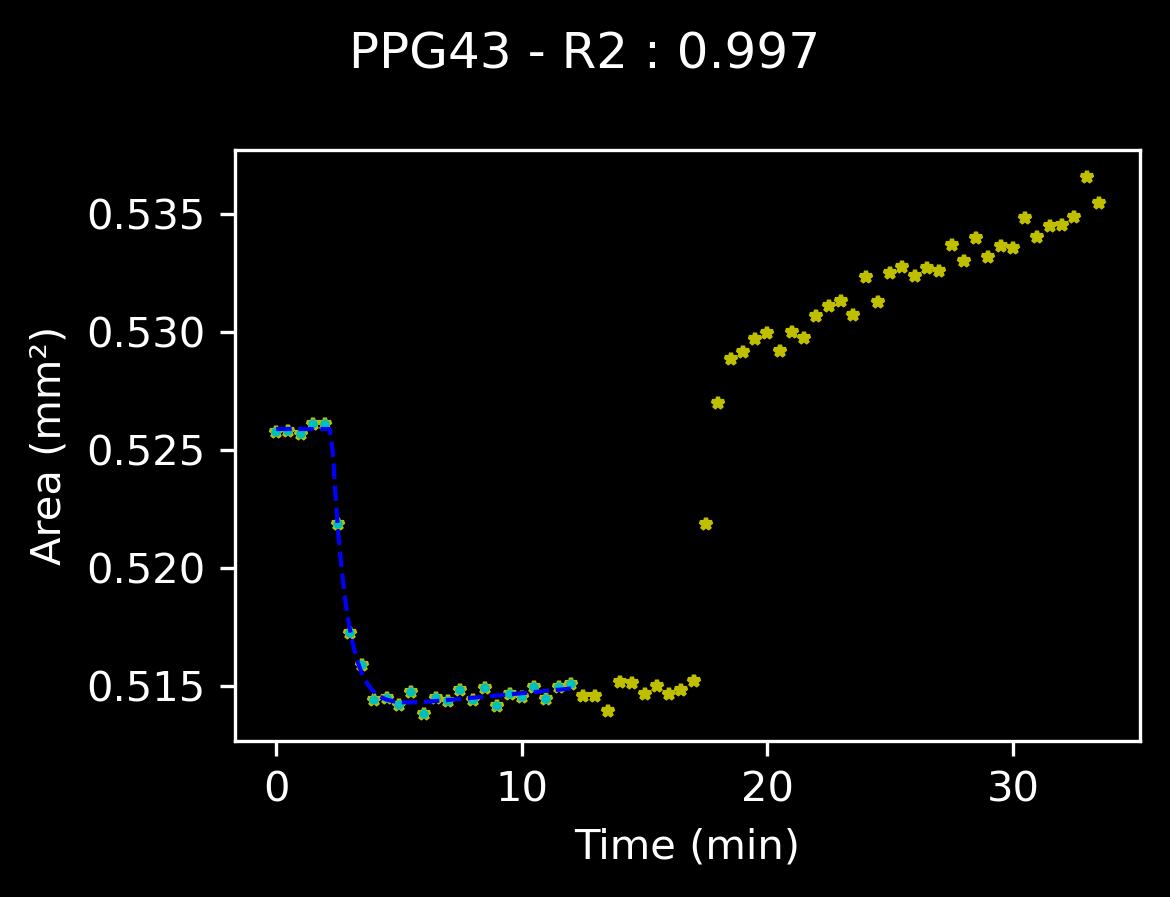

Fitting curve for : PPG44


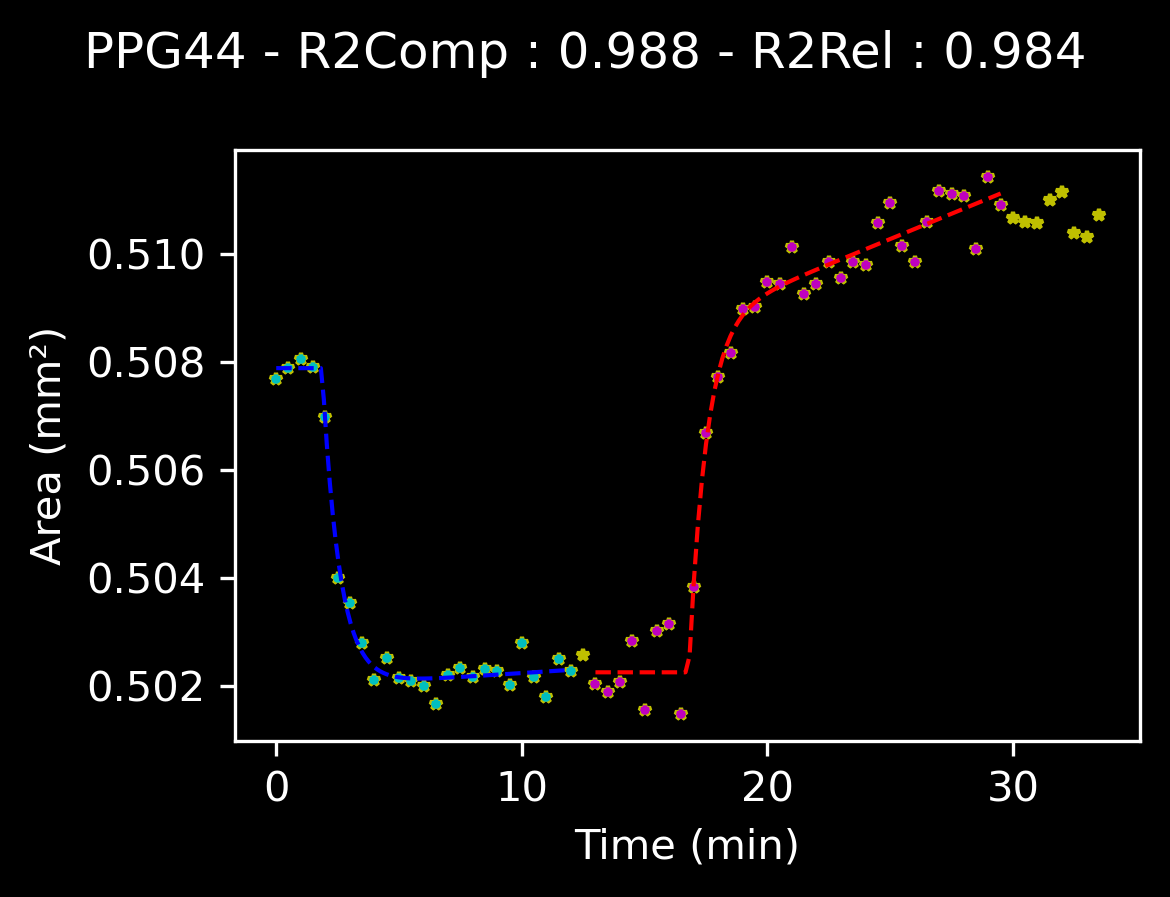

Fitting curve for : PPG45


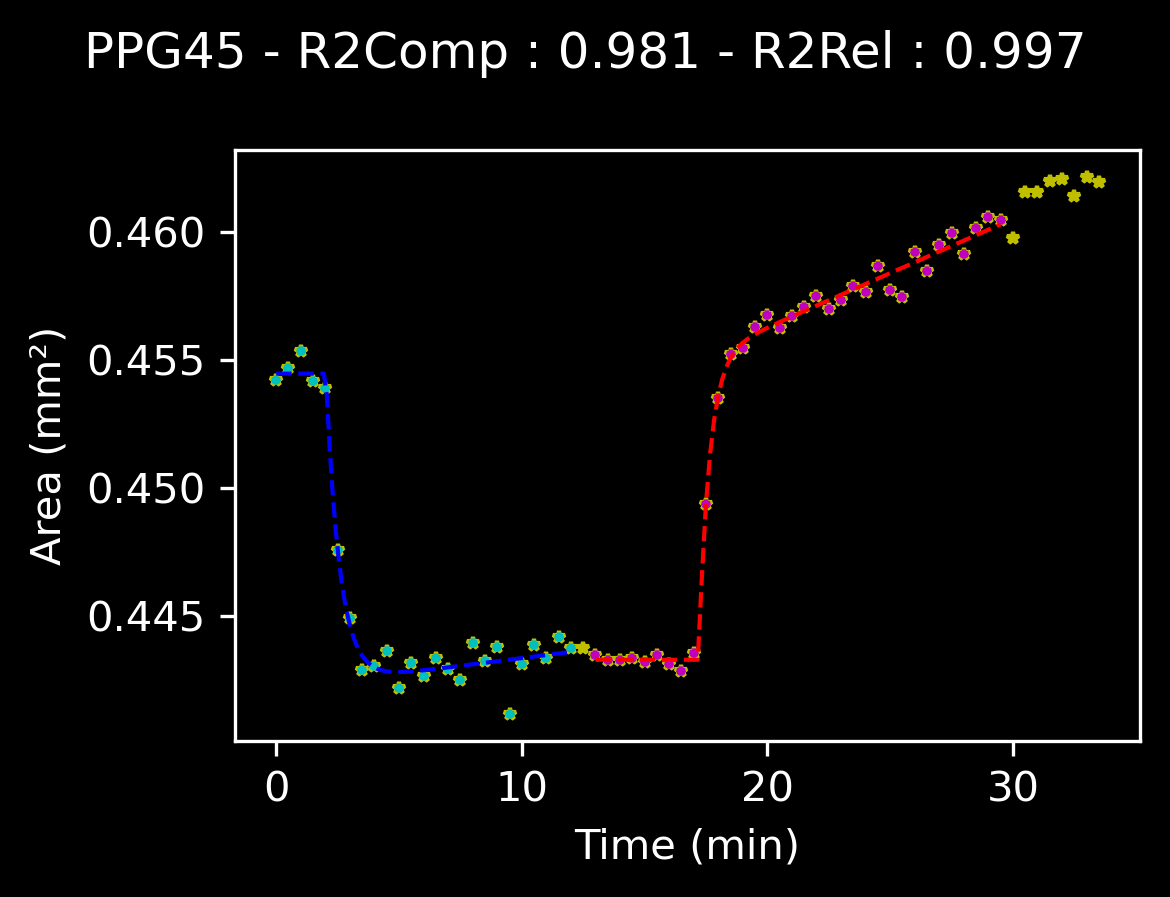

Fitting curve for : PPG46


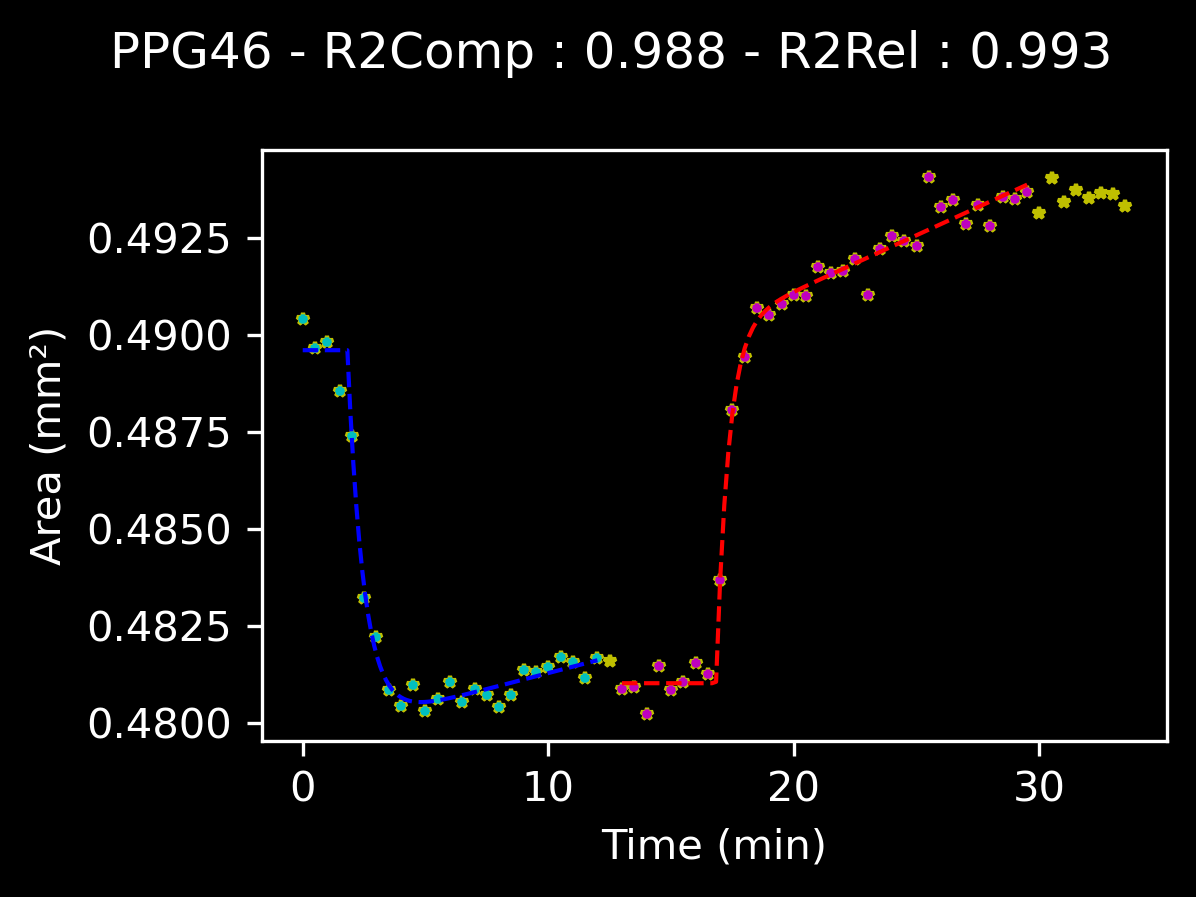

Fitting curve for : PPG47


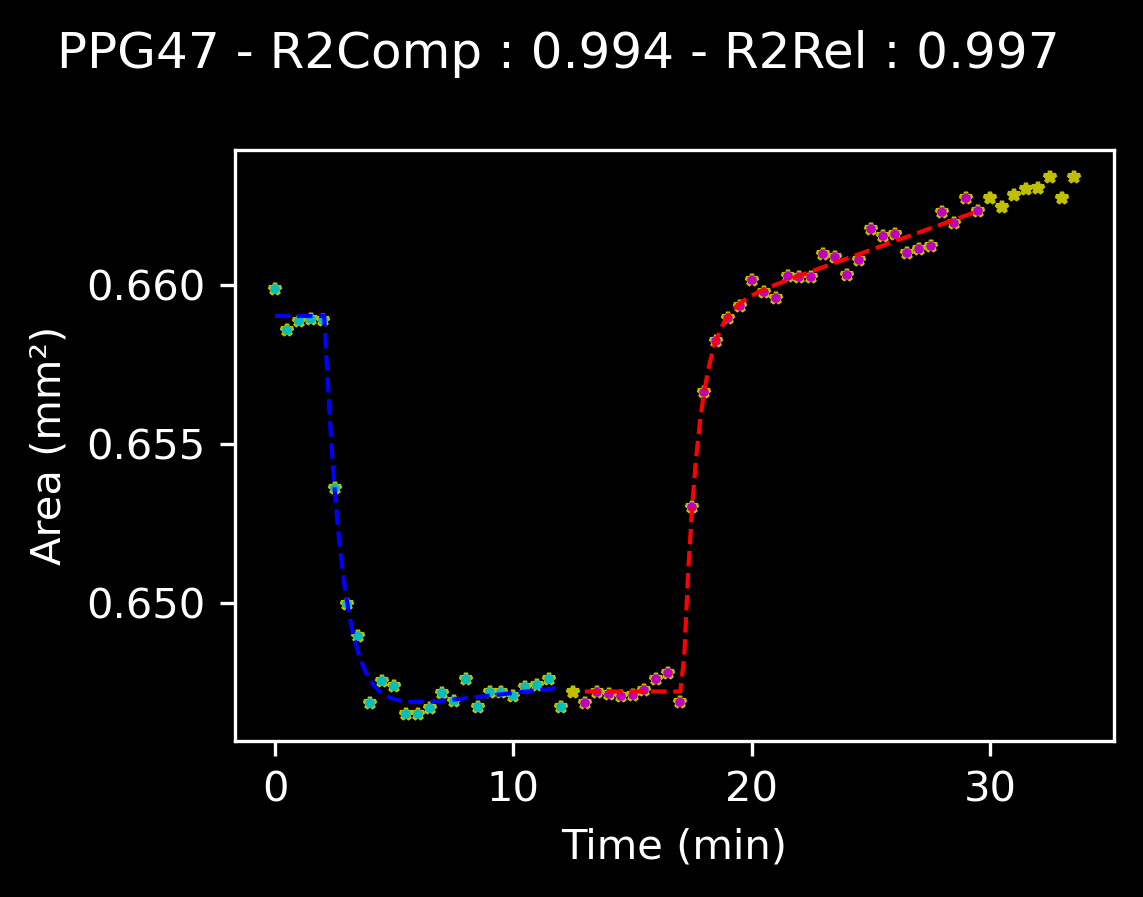

Fitting curve for : PPG48


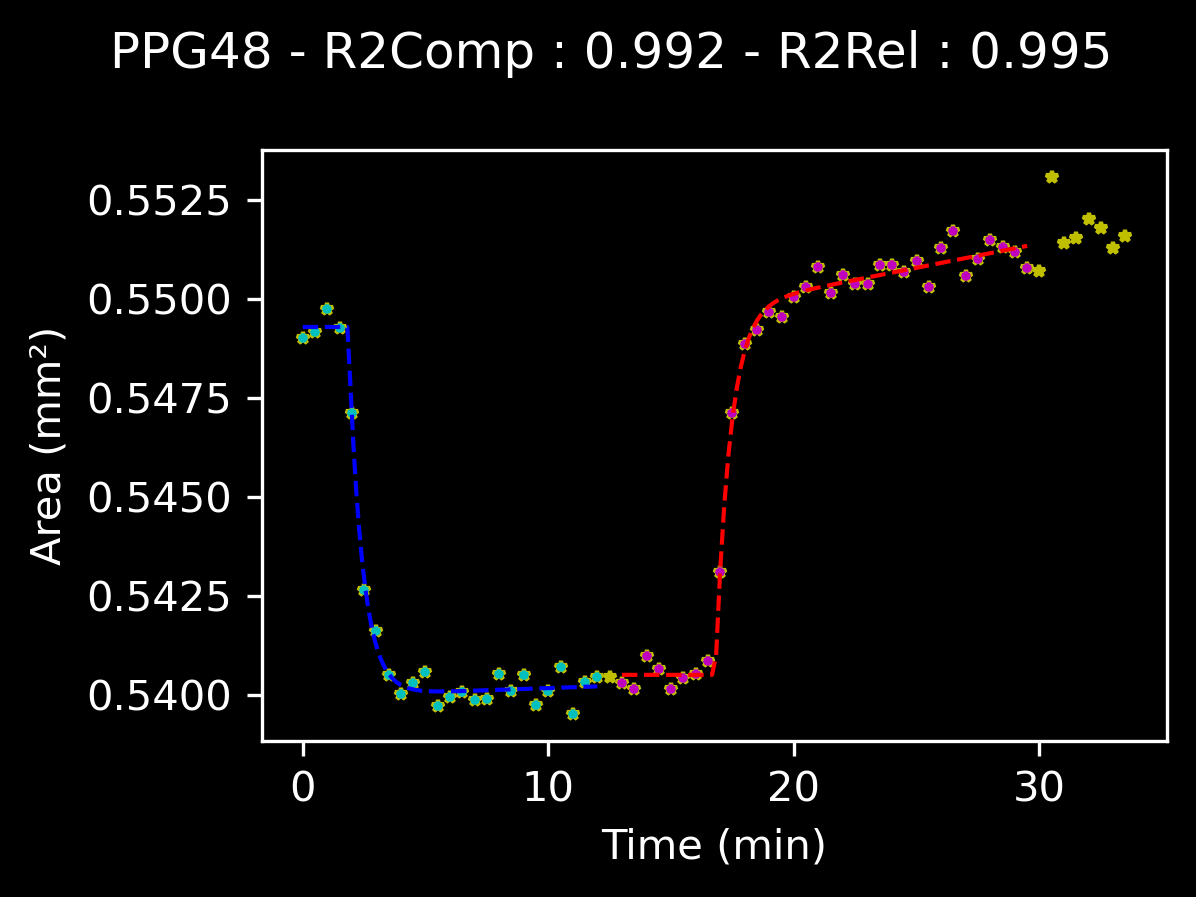

Fitting curve for : PPG49


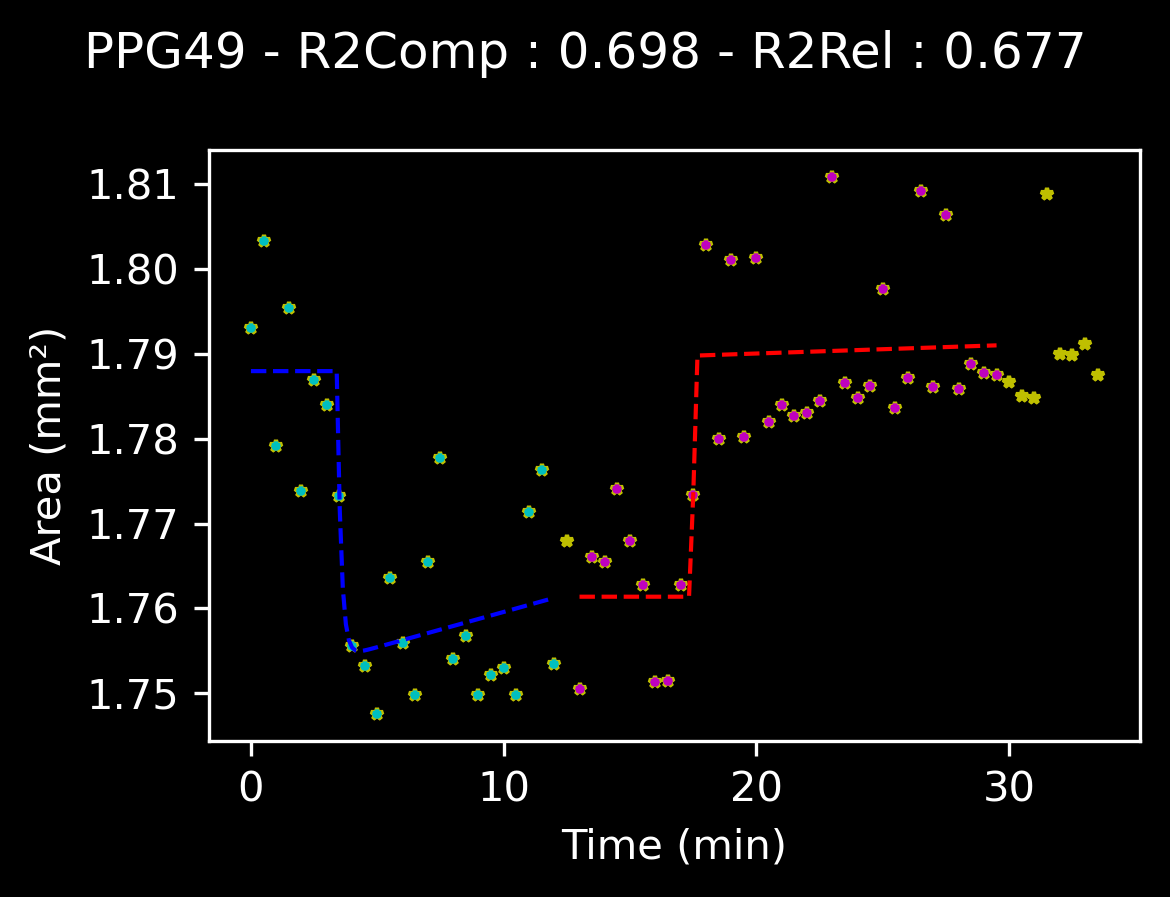

Fitting curve for : PPG50


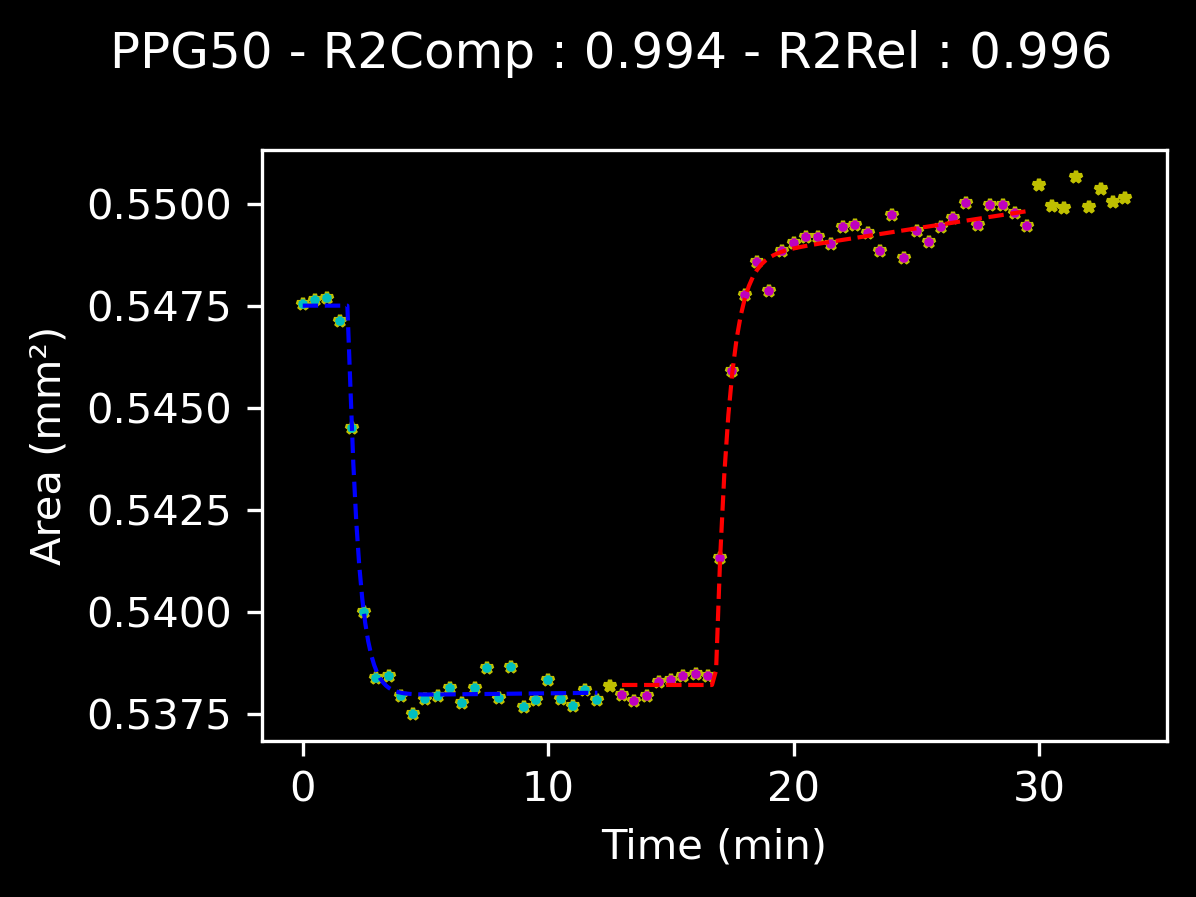

Fitting curve for : PPG51


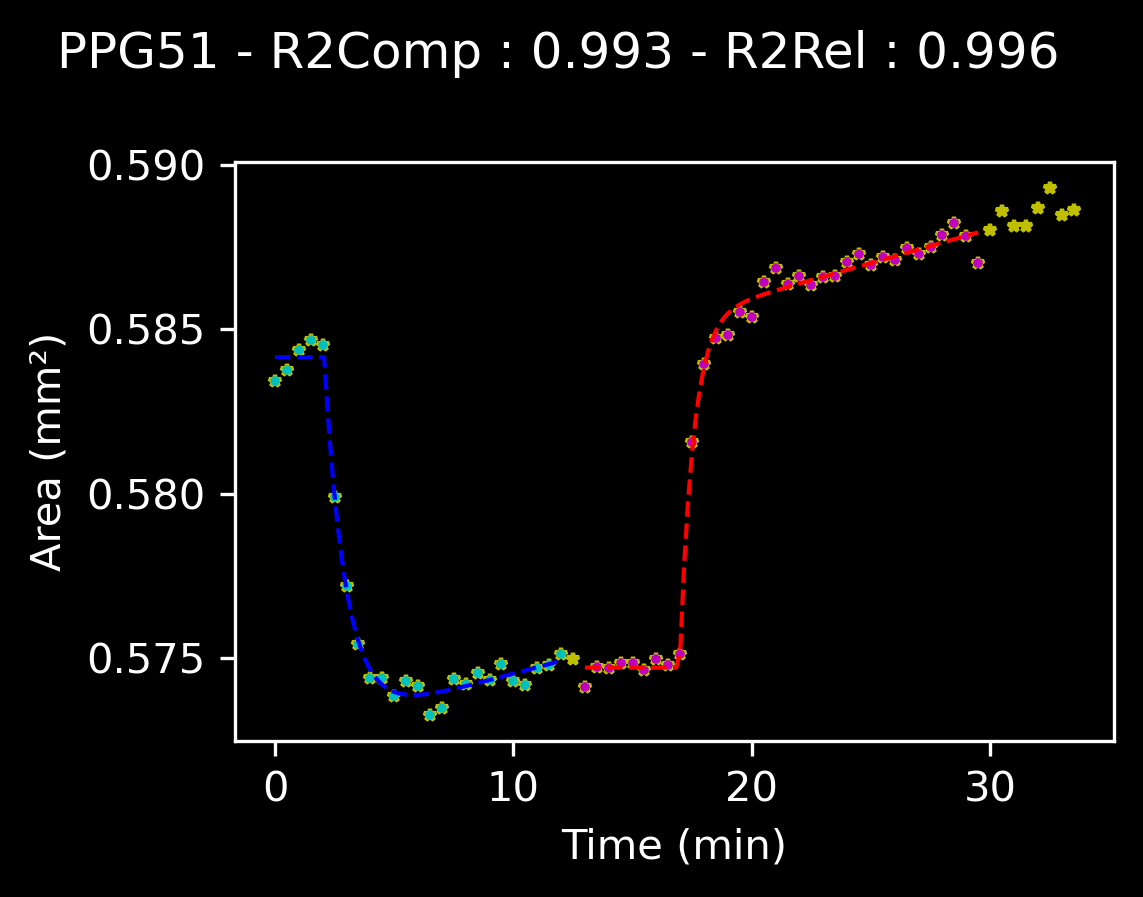

Analyzing : 230301_Ct_Osmo
Analyzing : 230301_Ct_Osmo


In [24]:

# BinarizeAndFitArea('230301_Ct_P1',StackList230301_Ct,P230301_Ct_P1,Scale230301,FPH230301,Delay230301,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = True, debuglist = [0,35], HSVrange =[(23, 25, 50),(60, 250,180)],
#                    fitwindow = 15,saveWB = False)


#########################################################################################################
# BinarizeAndFitArea('230301_Ct_P2',StackList230301_Ct,P230301_Ct_P2,Scale230301,FPH230301,Delay230301,0.90,'H>','F',
#                    debug = False, debugAll = False, verbose = True, debuglist = [0], HSVrange =[(23, 25, 50),(60, 250,180)],
#                    fitwindow = 15,saveWB = False)
#######################################################################################################


BinarizeAndFitOsChoc('230301_Ct_Osmo',StackList230301_Ct_Osmo,P230301_Ct_Osmo,Scale230301_Osmo,FPH230301_Osmo,0.95,'H>','F',
                   showHist = False, debug = True, debuglist = [0,55], HSVrange =[(23, 25, 50),(60, 250,180)],
                     FitIntervalComp = [0,25],FitIntervalRel = [26,60],TstartComp = 5,TstartRel = 9)

# BinarizeAndFitArea('230301_ABA_P1',StackList230301_ABA,P230301_ABA_P1,Scale230301,FPH230301,Delay230301,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = True, debuglist = [0,35], HSVrange =[(23, 25, 50),(60, 250,180)],
#                    fitwindow = 15,saveWB = False)


######################################################################################################
# BinarizeAndFitArea('230301_ABA_P2',StackList230301_ABA,P230301_ABA_P2,Scale230301,FPH230301,Delay230301,0.90,'H>','BCF',
#                    debug = False, debugAll = False, verbose = True, debuglist = [0], HSVrange =[(23, 25, 50),(60, 250,180)],
#                    fitwindow = 15,saveWB = False)
#####################################################################################################


# BinarizeAndFitOsChoc('230301_ABA_Osmo',StackList230301_ABA_Osmo,P230301_ABA_Osmo,Scale230301_Osmo,FPH230301_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, debuglist = [0,55], HSVrange =[(23, 25, 50),(60, 250,180)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [26,60],TstartComp = 5,TstartRel = 9)



# GD230301_Ct_P1  = pd.read_csv(P230301_Ct_P1 + '\\GlobalData230301_Ct_P1_AreaFit.csv', index_col = 'Ind')
# GD230301_Ct_P2  = pd.read_csv(P230301_Ct_P2 + '\\GlobalData230301_Ct_P2_AreaFit.csv', index_col = 'Ind')

# GD230301_Ct_P1.loc[GD230301_Ct_P1['Img']==0,'GR_end'] = GD230301_Ct_P2.loc[GD230301_Ct_P2['Img']==0,'GR_end']

# GD230301_Ct_P1.to_csv(P230301_Ct_P1 + '\\GlobalData230301_Ct_AreaFit.csv',index_label = 'Ind')

# GD230301_ABA_P1  = pd.read_csv(P230301_ABA_P1 + '\\GlobalData230301_ABA_P1_AreaFit.csv', index_col = 'Ind')
# GD230301_ABA_P2  = pd.read_csv(P230301_ABA_P2 + '\\GlobalData230301_ABA_P2_AreaFit.csv', index_col = 'Ind')

# GD230301_ABA_P1.loc[GD230301_ABA_P1['Img']==0,'GR_end'] = GD230301_ABA_P2.loc[GD230301_ABA_P2['Img']==0,'GR_end']

# GD230301_ABA_P1.to_csv(P230301_ABA_P1 + '\\GlobalData230301_ABA_AreaFit.csv',index_label = 'Ind')

### Natalia's ABA experiments 

#### 22-06-14

In [25]:
# BinarizeAndFitArea('220614_Ct',StackList220614_Ct,P220614_Ct,Scale220614,FPH220614,Delay220614,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220614_ABA',StackList220614_ABA,P220614_ABA,Scale220614,FPH220614,Delay220614,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)


#### 22-07-01

In [26]:
# BinarizeAndFitArea('220701_Ct',StackList220701_Ct,P220701_Ct,Scale220701,FPH220701,Delay220701,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220701_ABA',StackList220701_ABA,P220701_ABA,Scale220701,FPH220701,Delay220701,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

#### 22-07-22

In [27]:

# BinarizeAndFitArea('220722_Ct',StackList220722_Ct,P220722_Ct,Scale220722,FPH220722,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220722_ABA',StackList220722_ABA,P220722_ABA,Scale220722,FPH220722,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = False, verbose = False, debuglist = [83,91,100,105,107,109], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)


## Test Zone

In [28]:
# %run D:/Users/laplaud/Desktop/PostDoc/Code/JupyterNB/PropaguleAnalysis/2_AreaAnalysis.ipynb

In [29]:
# import os

# def countlines(start, lines=0, header=True, begin_start=None):
#     if header:
#         print('{:>10} |{:>10} | {:<20}'.format('ADDED', 'TOTAL', 'FILE'))
#         print('{:->11}|{:->11}|{:->20}'.format('', '', ''))

#     for thing in os.listdir(start):
#         thing = os.path.join(start, thing)
#         if os.path.isfile(thing):
#             if thing.endswith('.py'):
#                 with open(thing, 'r') as f:
#                     newlines = f.readlines()
#                     newlines = len(newlines)
#                     lines += newlines
# # 
#                     if begin_start is not None:
#                         reldir_of_thing = '.' + thing.replace(begin_start, '')
#                     else:
#                         reldir_of_thing = '.' + thing.replace(start, '')

#                     print('{:>10} |{:>10} | {:<20}'.format(
#                             newlines, lines, reldir_of_thing))


#     for thing in os.listdir(start):
#         thing = os.path.join(start, thing)
#         if os.path.isdir(thing):
#             lines = countlines(thing, lines, header=False, begin_start=start)

#     return lines

In [30]:
# countlines(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions')